In [1]:
import numpy as np
from numpy.core.umath_tests import inner1d
import scipy
import scipy.sparse
from sklearn.datasets import fetch_20newsgroups
import gensim
from collections import Counter
import heapq
import nltk
import random
from nltk.corpus import stopwords
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import time
import pickle
%matplotlib inline

In [2]:
def plot_mean(values):
    samples, iters = len(values), len(values[0])
    iter_range = range(1, iters + 1)
    val = np.mean(values, axis=0)
    err = 1.96 * np.std(values, axis=0) / np.sqrt(samples)
    plt.plot(iter_range, val)
    plt.fill_between(iter_range, val - err, val + err, alpha=0.5, facecolor='yellow')
    
def compare(values_list, ylabel='', legend=[]):
    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_subplot(1,1,1)
    major_ticks = np.arange(0, 101, 5)
    ax.set_xticks(major_ticks)   
    plt.ylim(0., np.max(values_list) * 1.01)
    for values in values_list:
        plot_mean(values)
    plt.xlabel('Iteration')
    plt.ylabel(ylabel)
    plt.legend(legend)
    plt.grid()
    plt.show()

def phi_experiment_res(path_base, path_artm):
    d = {}
    with open(path_base, 'r') as f:
        d['base_res'] = pickle.load(f)
    with open(path_artm, 'r') as f:
        d['artm_res'] = pickle.load(f)
    
    compare(
        [
            d['base_res']['train_perplexities'], 
            d['base_res']['test_perplexities'],
            d['artm_res']['train_perplexities'], 
            d['artm_res']['test_perplexities']
        ],
        'Perplexity',
        [
            'base train_perplexities', 
            'base test_perplexities',
            'artm train_perplexities', 
            'artm test_perplexities'
        ]
    )
    
    compare(
        [
            d['base_res']['kernel_avg_sizes'], 
            d['artm_res']['kernel_avg_sizes']
        ],
        'Kernel avg sizes',
        [
            'base kernel_avg_sizes', 
            'artm kernel_avg_sizes'
        ]
    )
    
    compare(
        [
            d['base_res']['kernel_avg_jacards'], 
            d['artm_res']['kernel_avg_jacards']
        ],
        'Kernel avg jacards',
        [
            'base kernel_avg_jacards', 
            'artm kernel_avg_jacards'
        ]
    )
    
    compare(
        [
            d['base_res']['top10_avg_jacards'], 
            d['artm_res']['top10_avg_jacards']
        ],
        'Top10 avg jacards',
        [
            'base top10_avg_jacards', 
            'artm top10_avg_jacards'
        ]
    )
    
    compare(
        [
            d['base_res']['top50_avg_jacards'], 
            d['artm_res']['top50_avg_jacards']
        ],
        'Top50 avg jacards',
        [
            'base top50_avg_jacards', 
            'artm top50_avg_jacards'
        ]
    )
    
    compare(
        [
            d['base_res']['top100_avg_jacards'], 
            d['artm_res']['top100_avg_jacards']
        ],
        'Top100 avg jacards',
        [
            'base top100_avg_jacards', 
            'artm top100_avg_jacards'
        ]
    )
    
    compare(
        [
            d['base_res']['top200_avg_jacards'], 
            d['artm_res']['top200_avg_jacards']
        ],
        'Top200 avg jacards',
        [
            'base top200_avg_jacards', 
            'artm top200_avg_jacards'
        ]
    )
    
    compare(
        [
            d['base_res']['topic_correlations'], 
            d['artm_res']['topic_correlations']
        ],
        'Topic correlations',
        [
            'base topic_correlations', 
            'artm topic_correlations'
        ]
    )
    
    compare(
        [
            d['base_res']['sparsities'], 
            d['artm_res']['sparsities']
        ],
        'Phi sparsity',
        [
            'base sparsity', 
            'artm sparsity'
        ]
    )
    
    compare(
        [
            d['base_res']['theta_sparsities'], 
            d['artm_res']['theta_sparsities']
        ],
        'Theta sparsity',
        [
            'base theta sparsity', 
            'artm theta sparsity'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top5_pmis'], 
            d['artm_res']['avg_top5_pmis']
        ],
        'Top5 PMI',
        [
            'base avg_top5_pmis', 
            'artm avg_top5_pmis'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top10_pmis'], 
            d['artm_res']['avg_top10_pmis']
        ],
        'Top10 PMI',
        [
            'base avg_top10_pmis', 
            'artm avg_top10_pmis'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top20_pmis'], 
            d['artm_res']['avg_top20_pmis']
        ],
        'Top20 PMI',
        [
            'base avg_top20_pmis', 
            'artm avg_top20_pmis'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top30_pmis'], 
            d['artm_res']['avg_top30_pmis']
        ],
        'Top30 PMI',
        [
            'base avg_top30_pmis', 
            'artm avg_top30_pmis'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top5_ppmis'], 
            d['artm_res']['avg_top5_ppmis']
        ],
        'Top5 PPMI',
        [
            'base avg_top5_ppmis', 
            'artm avg_top5_ppmis'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top10_ppmis'], 
            d['artm_res']['avg_top10_ppmis']
        ],
        'Top10 PPMI',
        [
            'base avg_top10_ppmis', 
            'artm avg_top10_ppmis'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top20_ppmis'], 
            d['artm_res']['avg_top20_ppmis']
        ],
        'Top20 PPMI',
        [
            'base avg_top20_ppmis', 
            'artm avg_top20_ppmis'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top30_ppmis'], 
            d['artm_res']['avg_top30_ppmis']
        ],
        'Top30 PPMI',
        [
            'base avg_top30_ppmis', 
            'artm avg_top30_ppmis'
        ]
    )

# $T=10$

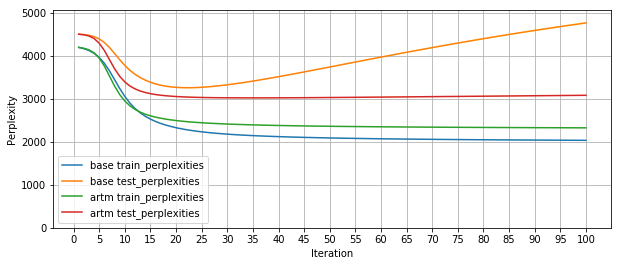

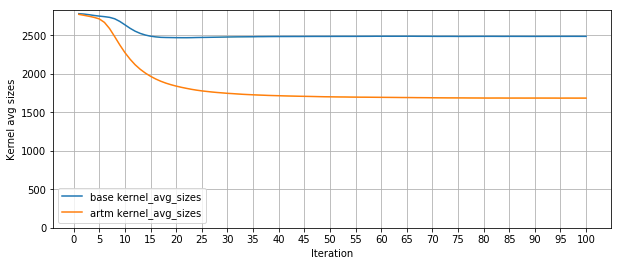

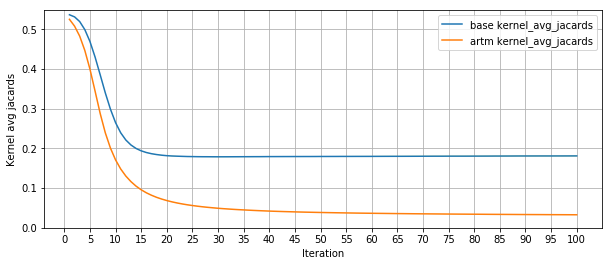

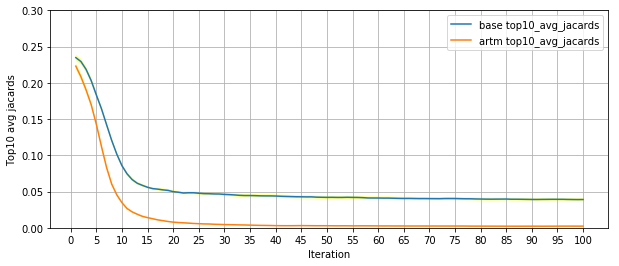

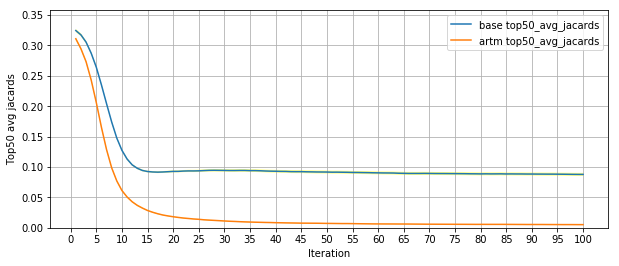

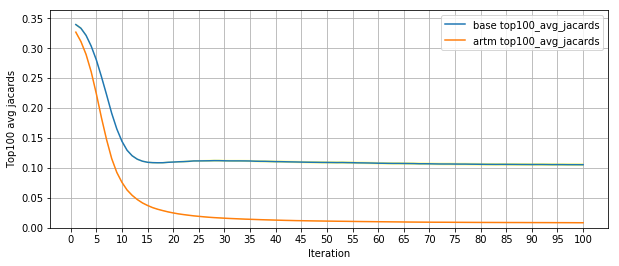

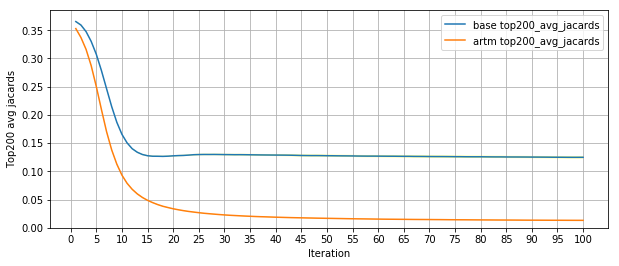

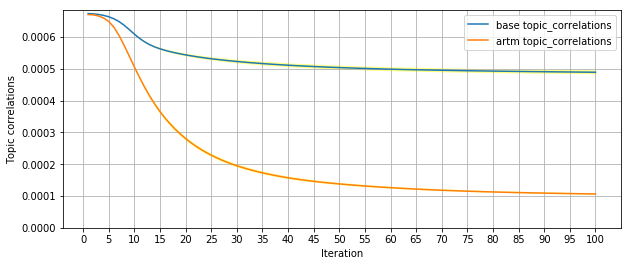

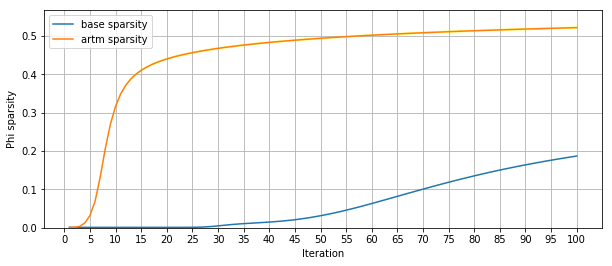

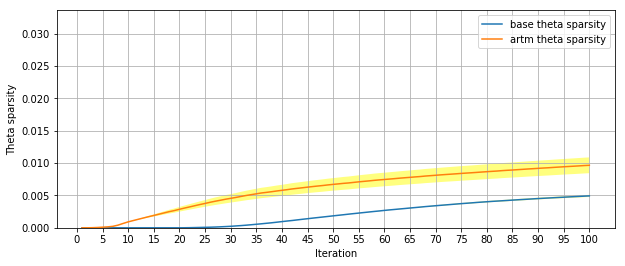

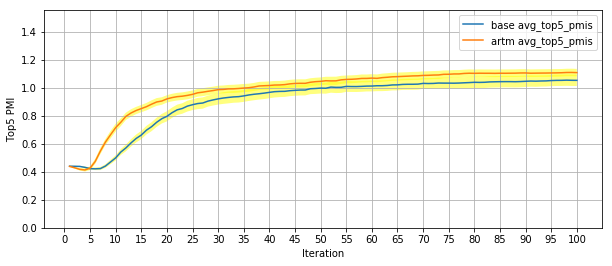

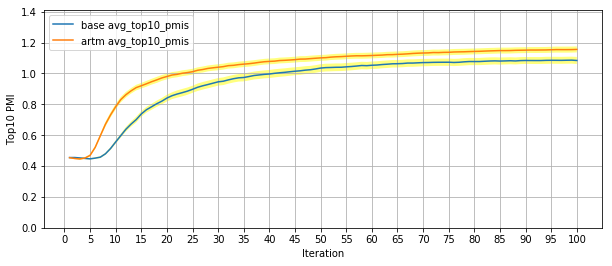

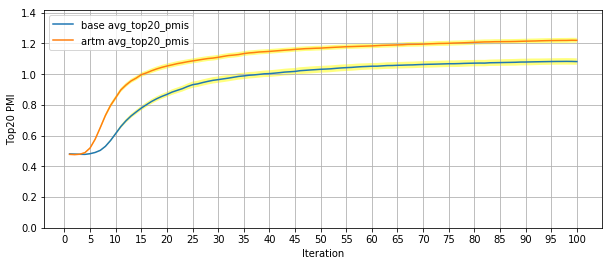

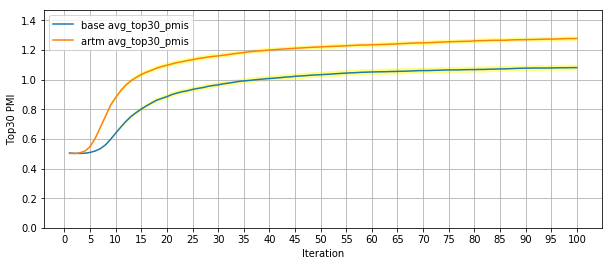

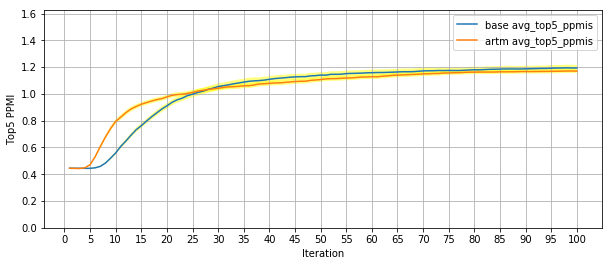

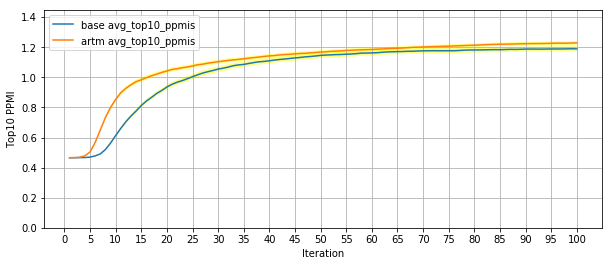

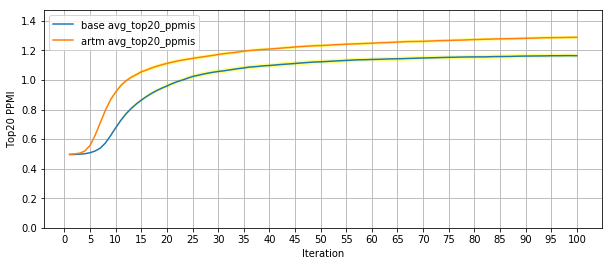

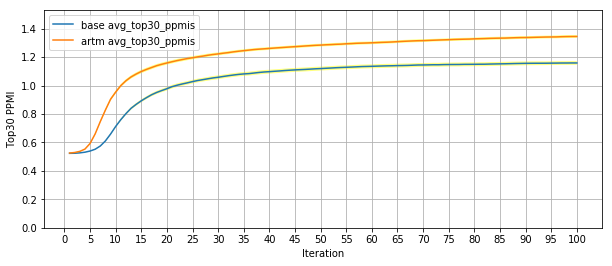

In [3]:
phi_experiment_res('20news_experiment/20news_10t_base_0_0.pkl', '20news_experiment/20news_10t_artm_0_0.pkl')

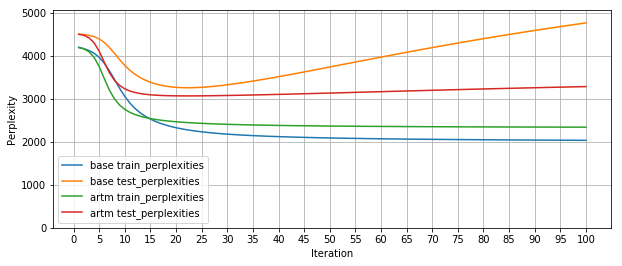

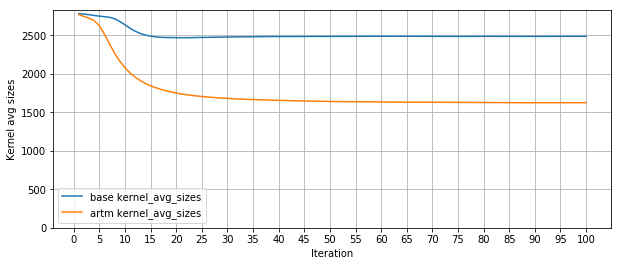

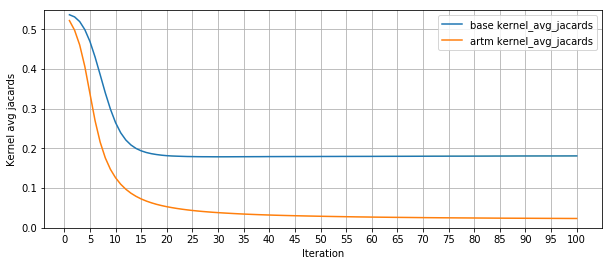

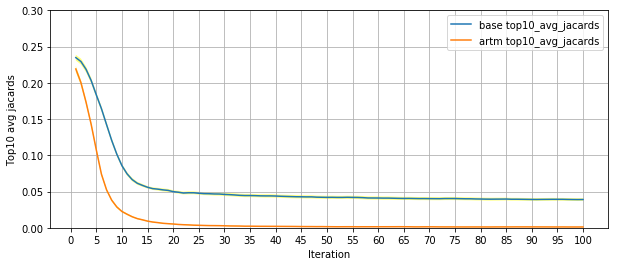

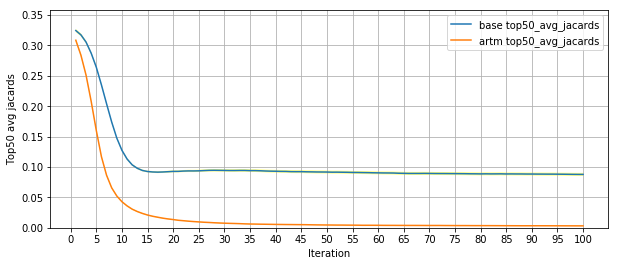

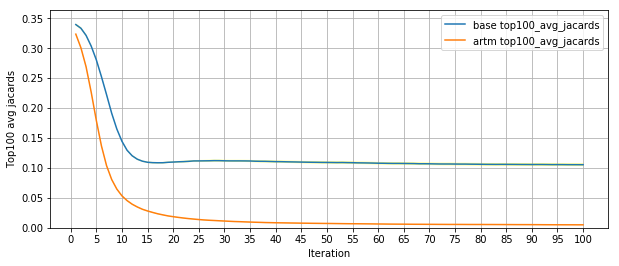

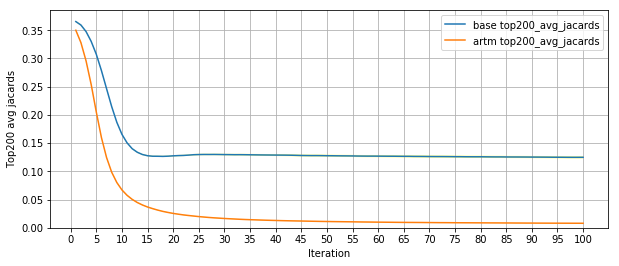

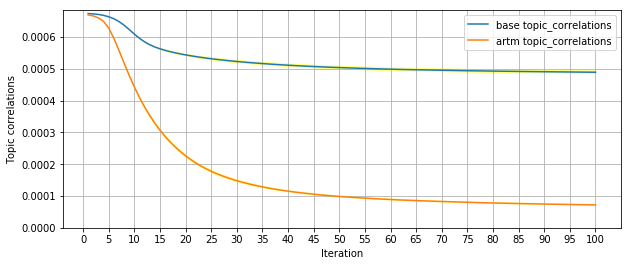

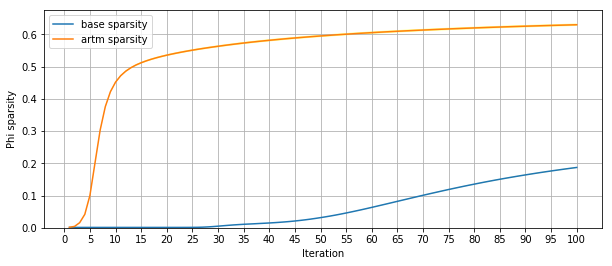

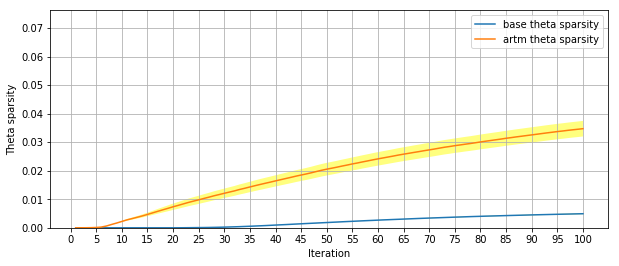

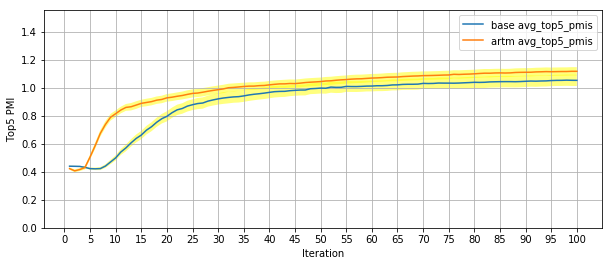

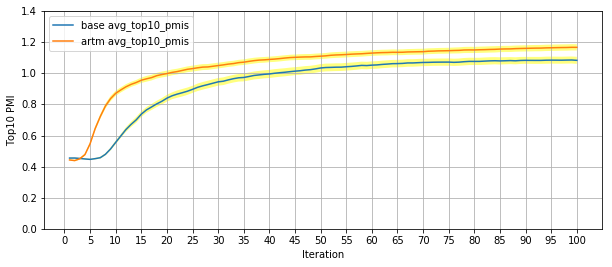

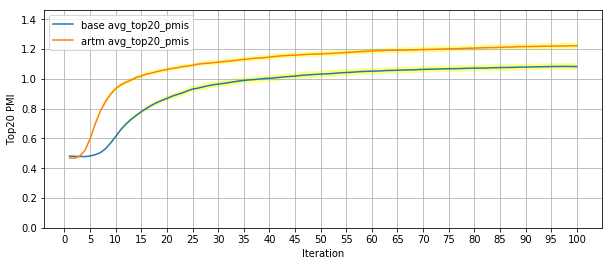

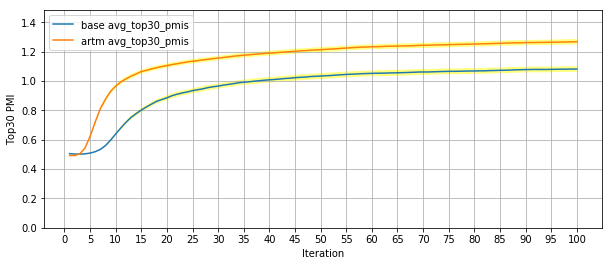

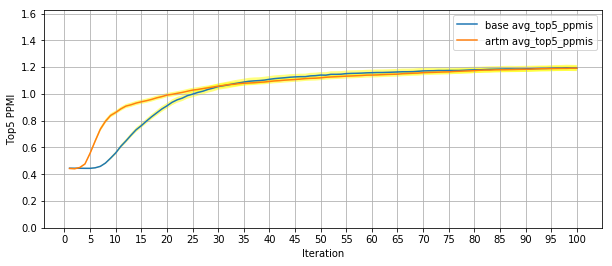

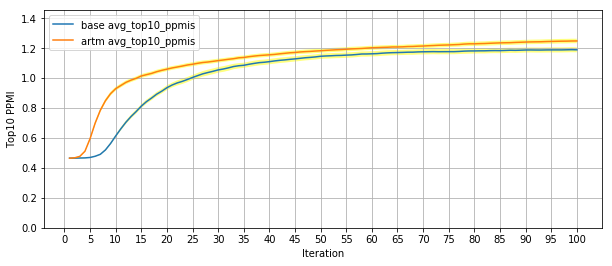

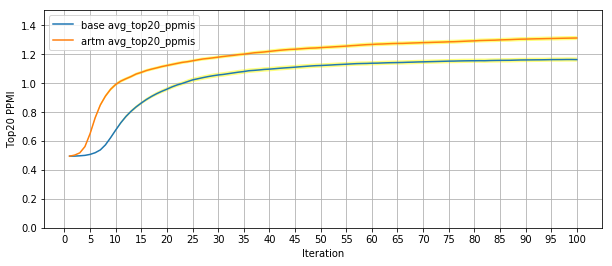

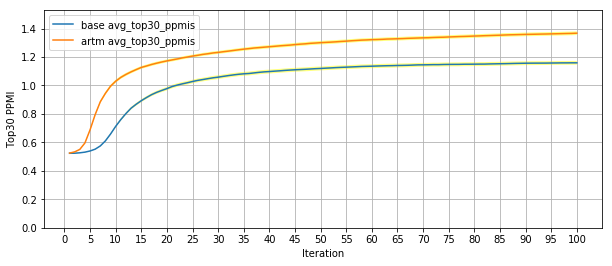

In [4]:
phi_experiment_res('20news_experiment/20news_10t_base_0_0.pkl', '20news_experiment/20news_10t_artm_0_0_cheat.pkl')

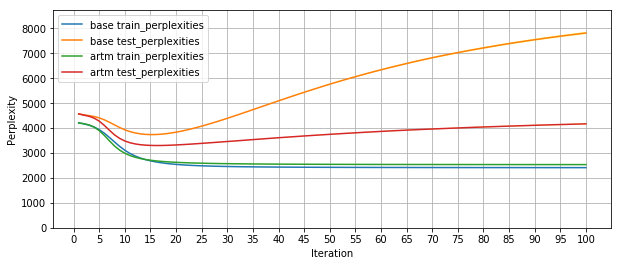

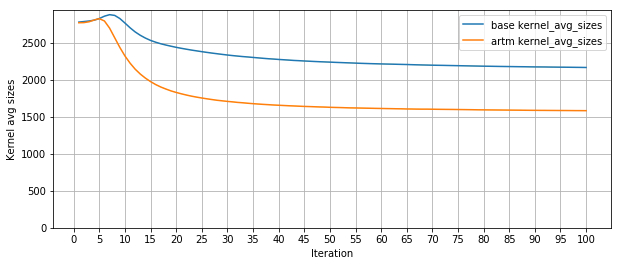

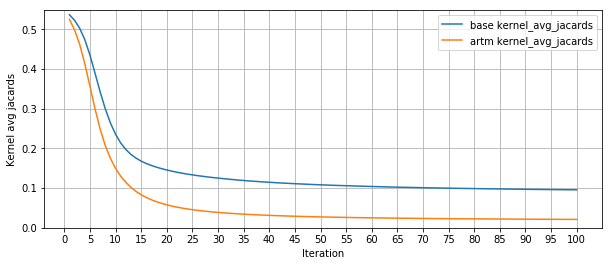

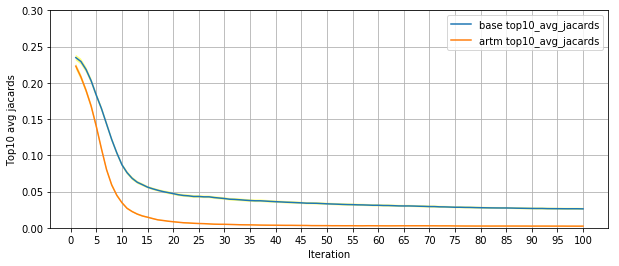

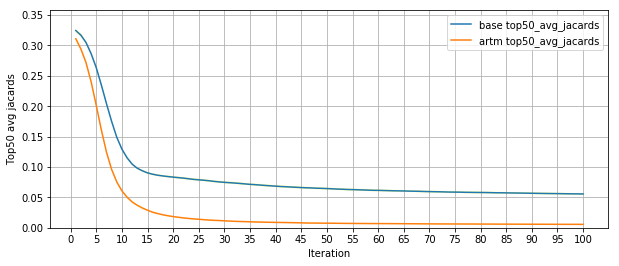

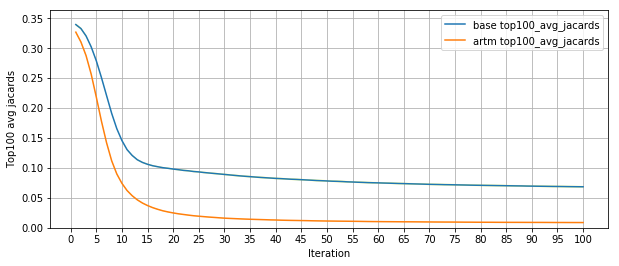

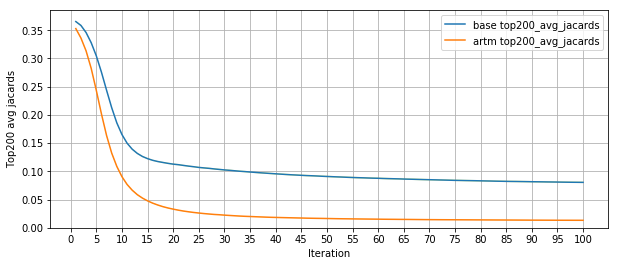

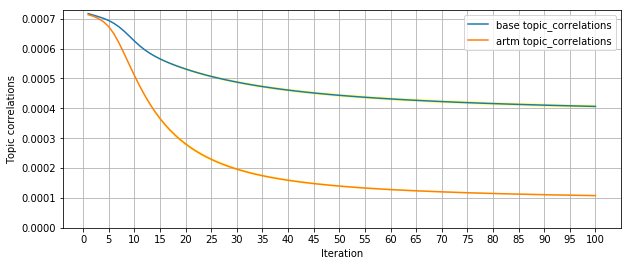

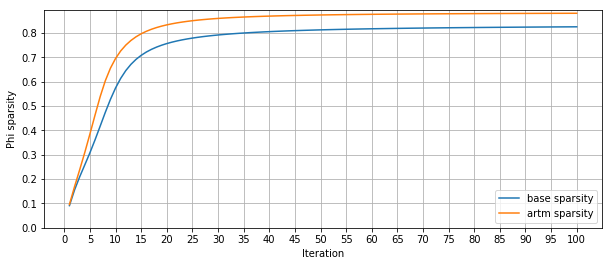

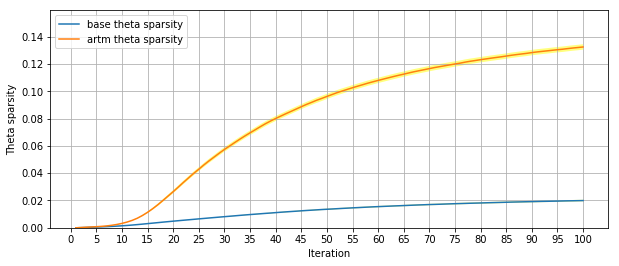

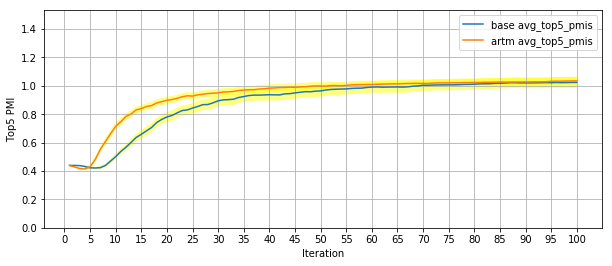

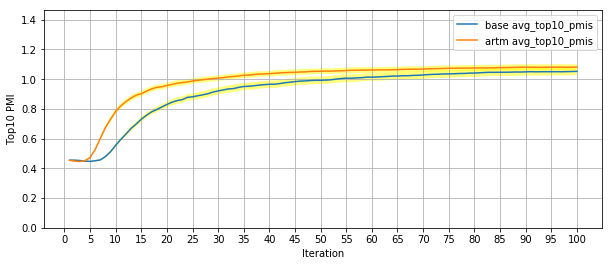

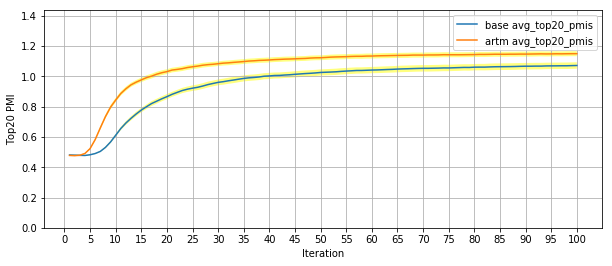

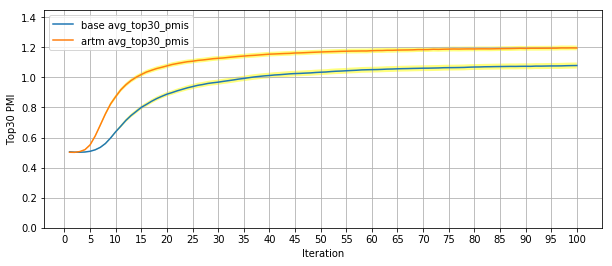

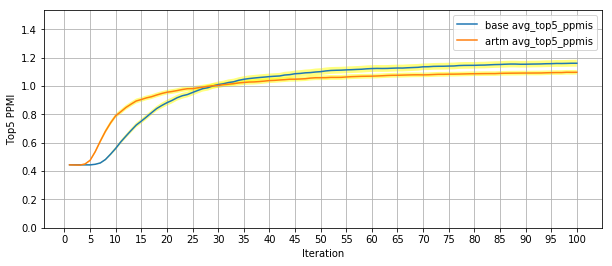

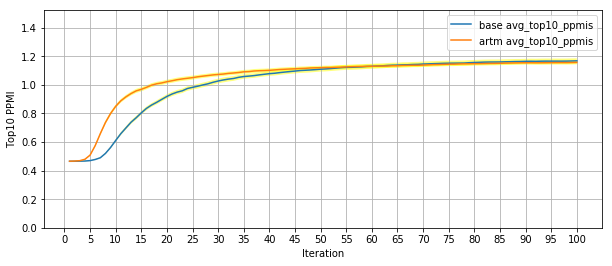

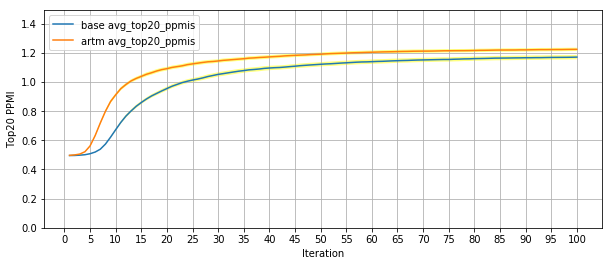

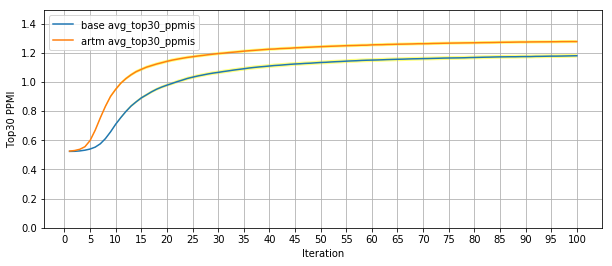

In [5]:
phi_experiment_res('20news_experiment/20news_10t_base_-0.1_0.pkl', '20news_experiment/20news_10t_artm_-0.1_0.pkl')

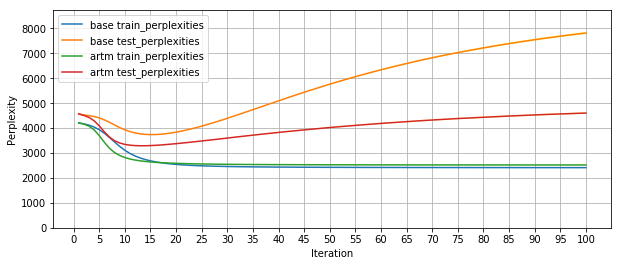

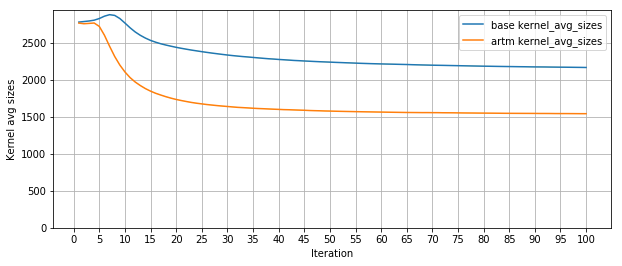

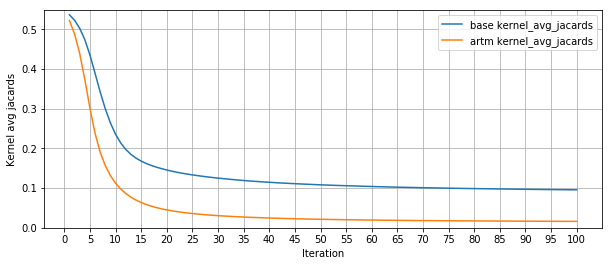

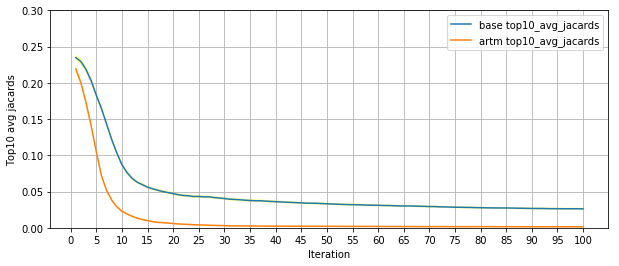

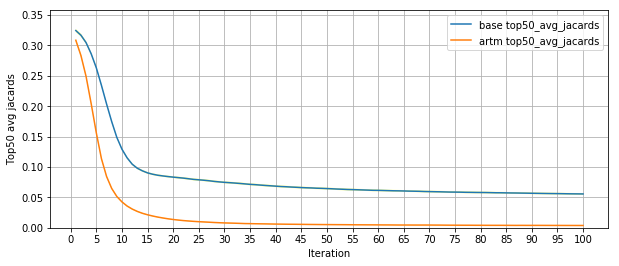

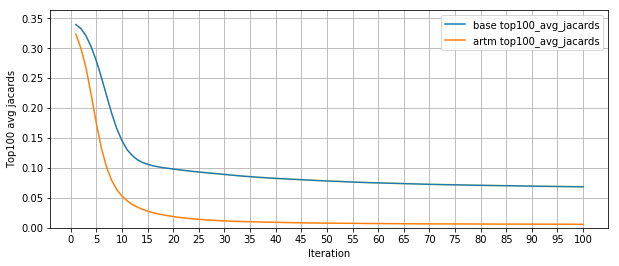

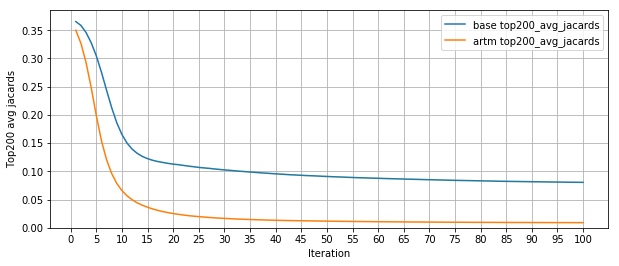

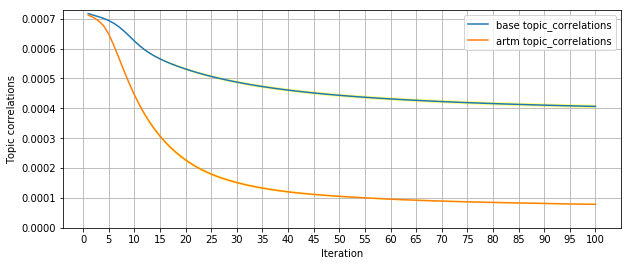

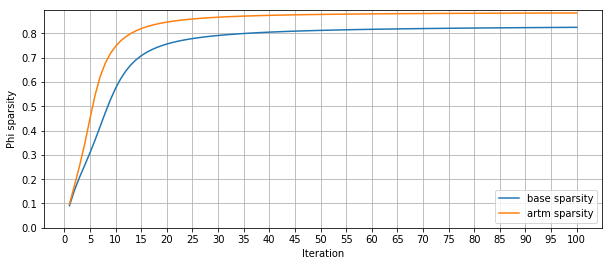

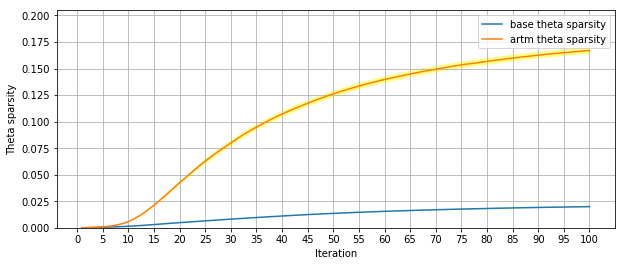

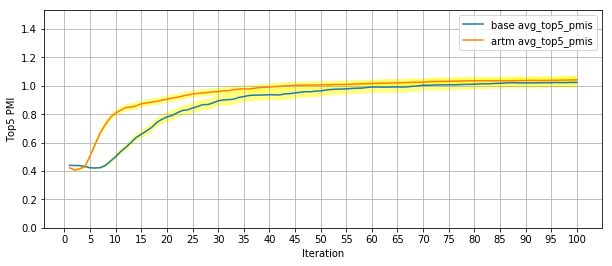

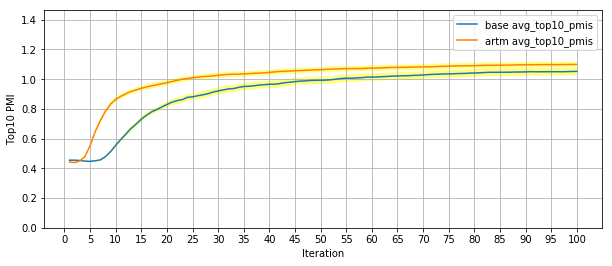

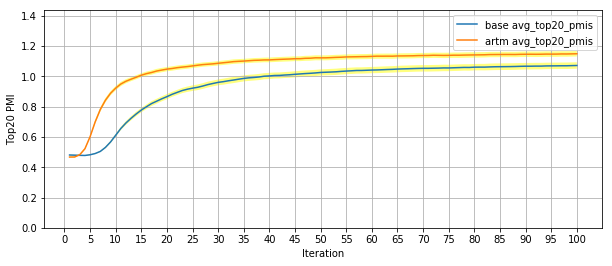

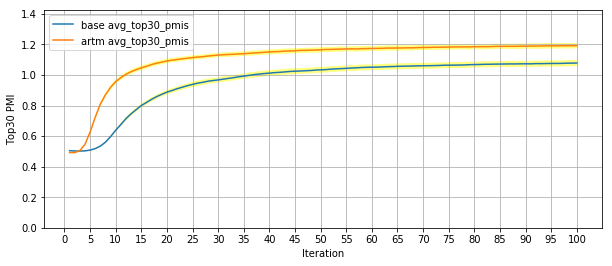

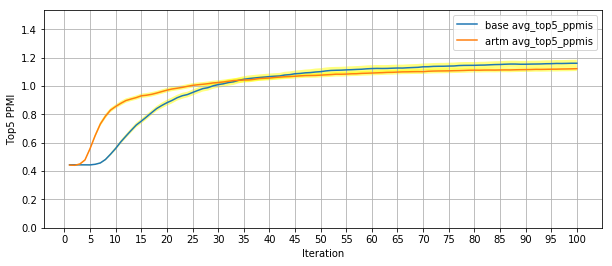

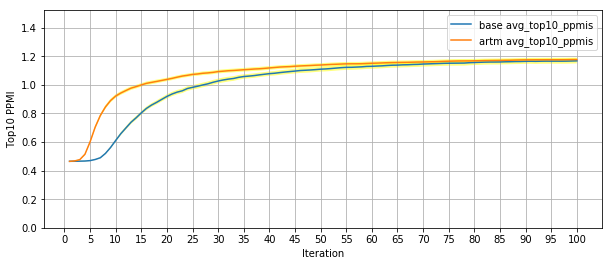

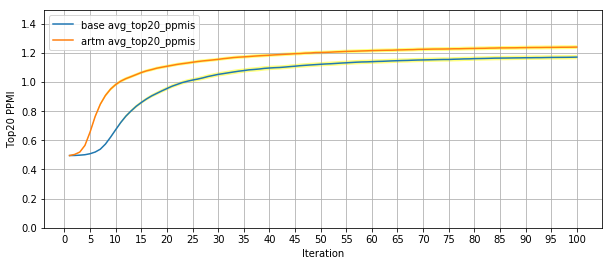

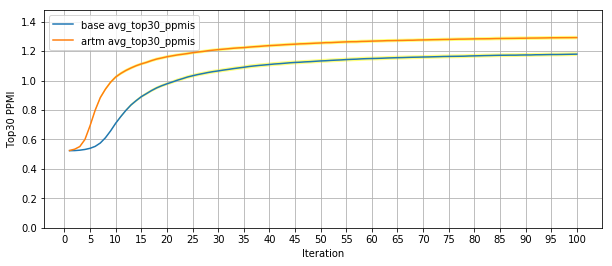

In [6]:
phi_experiment_res('20news_experiment/20news_10t_base_-0.1_0.pkl', '20news_experiment/20news_10t_artm_-0.1_0_cheat.pkl')

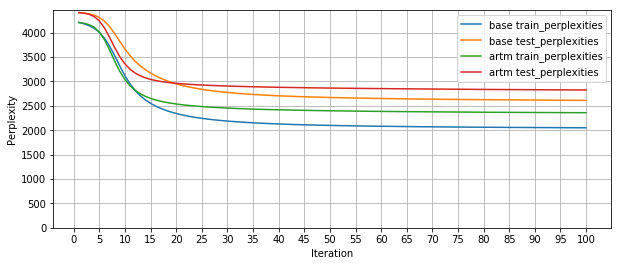

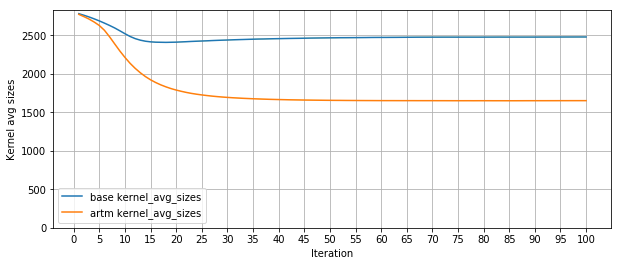

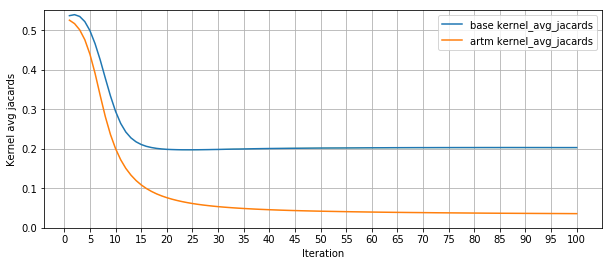

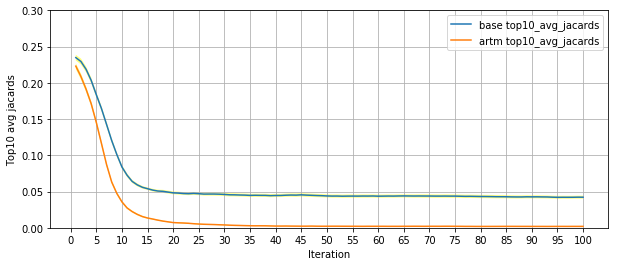

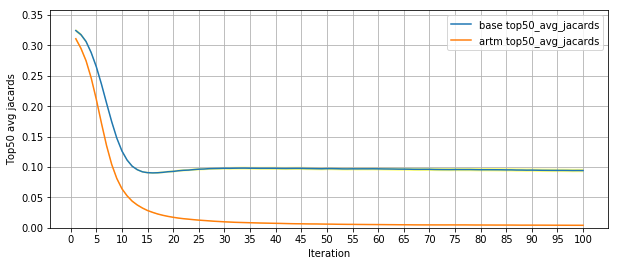

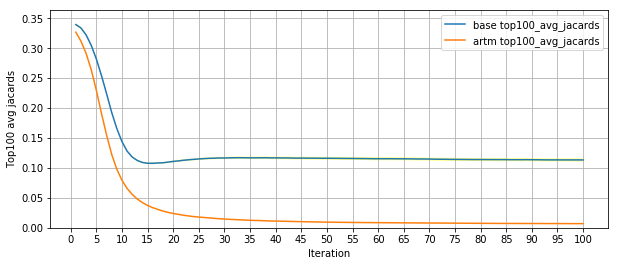

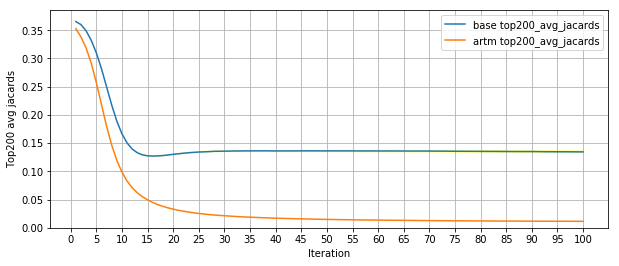

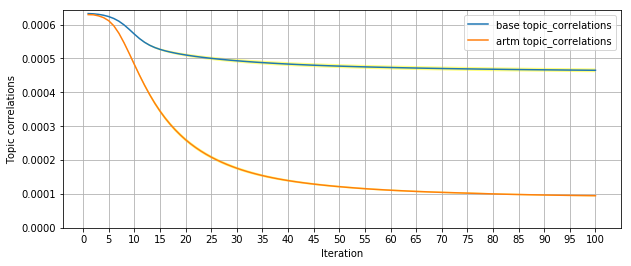

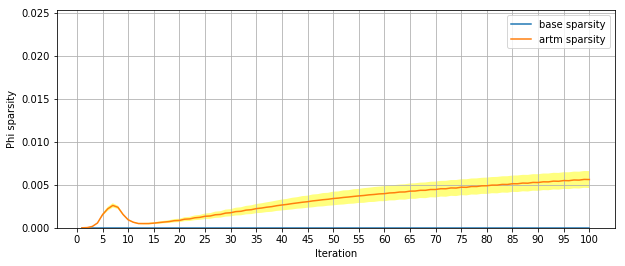

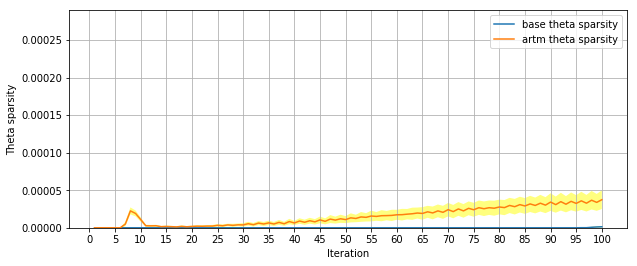

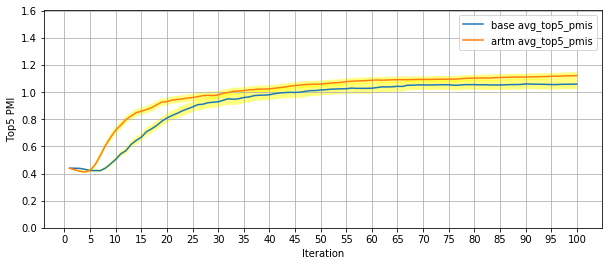

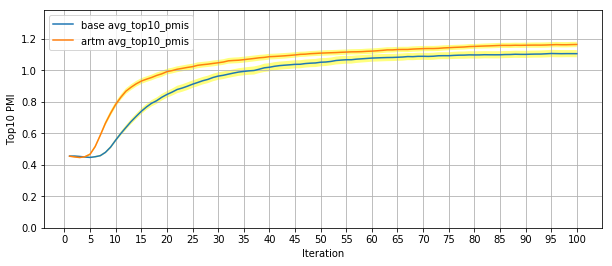

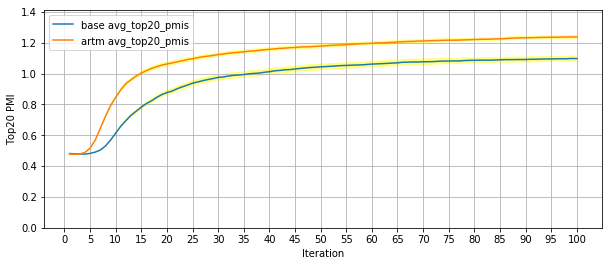

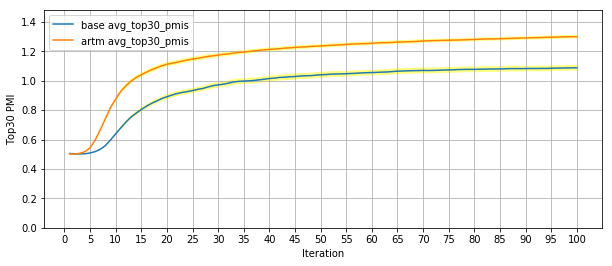

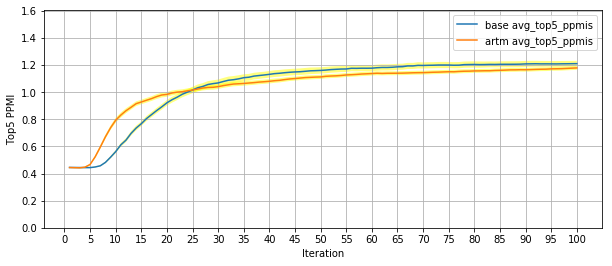

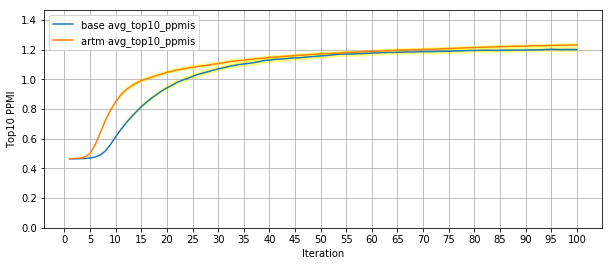

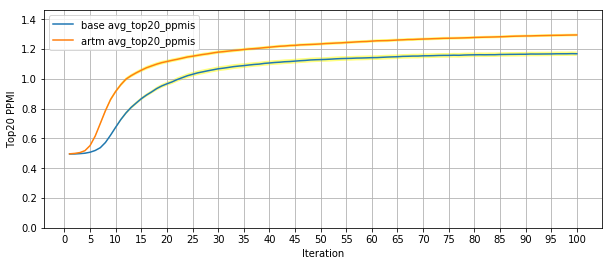

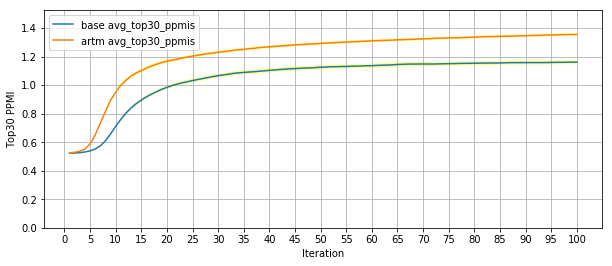

In [7]:
phi_experiment_res('20news_experiment/20news_10t_base_+0.1_0.pkl', '20news_experiment/20news_10t_artm_+0.1_0.pkl')

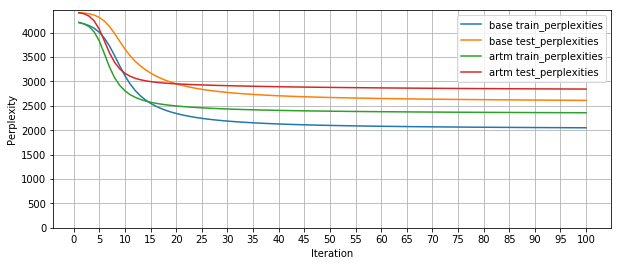

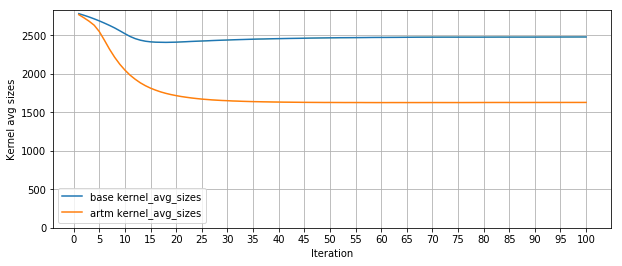

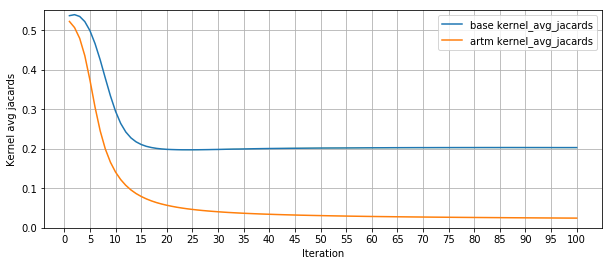

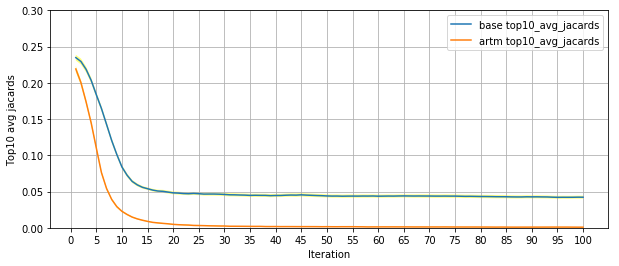

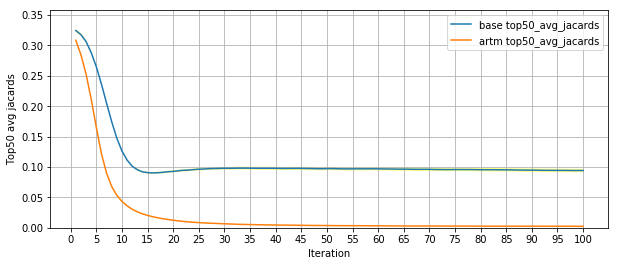

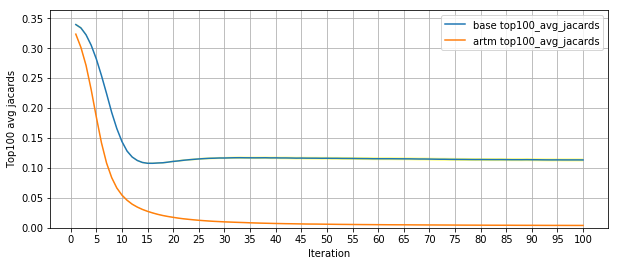

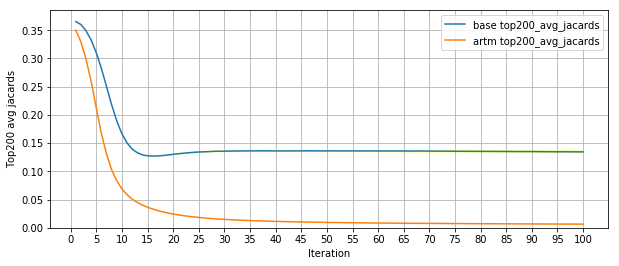

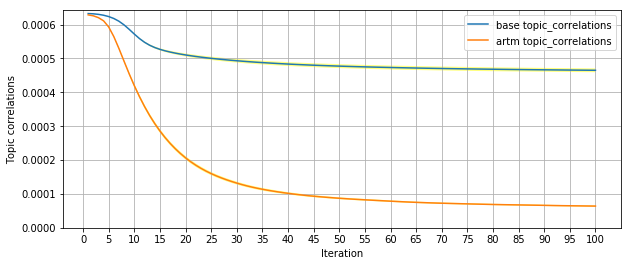

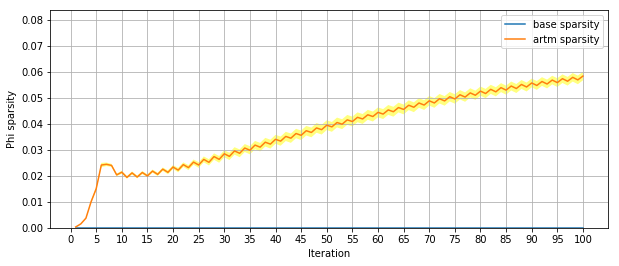

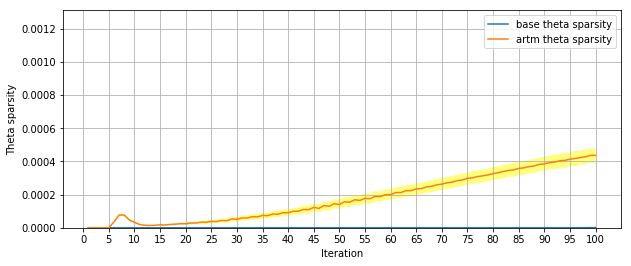

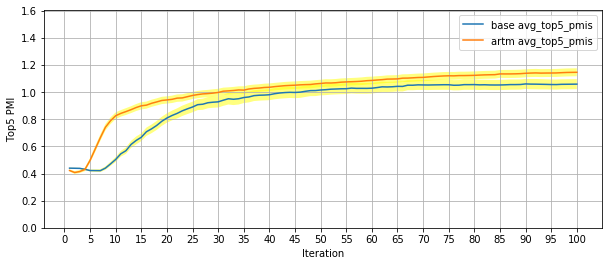

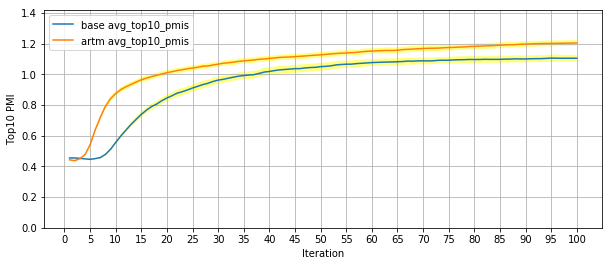

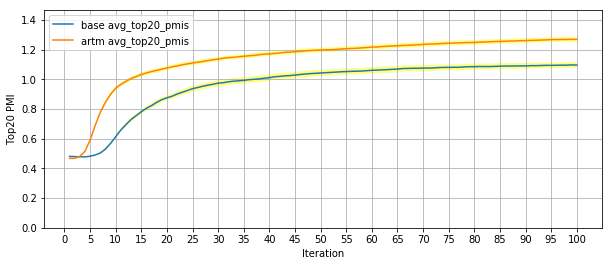

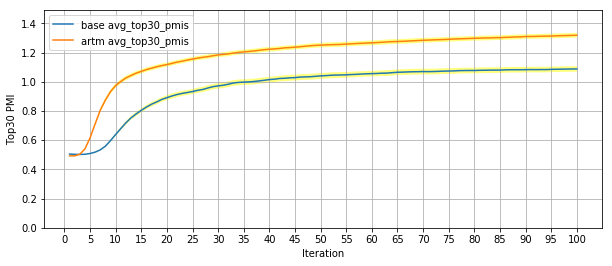

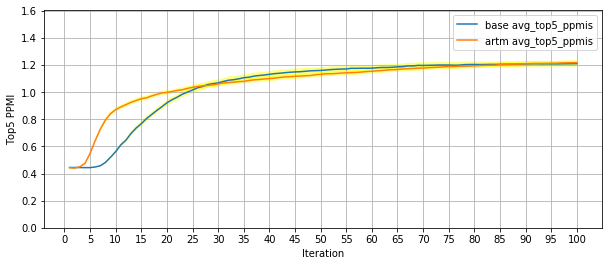

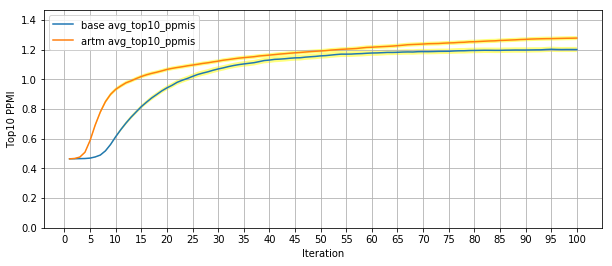

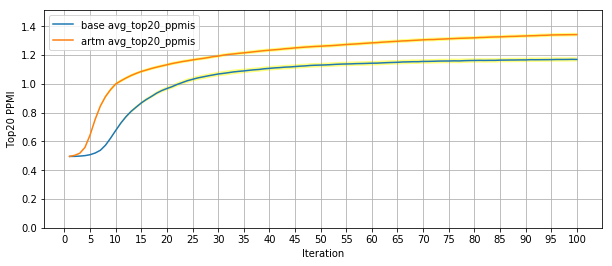

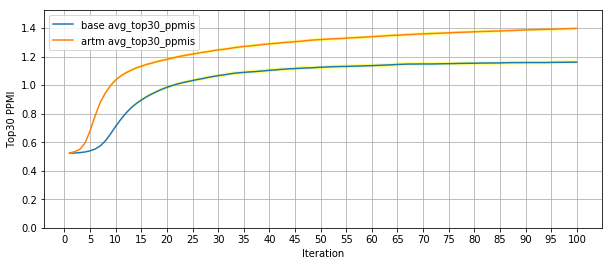

In [8]:
phi_experiment_res('20news_experiment/20news_10t_base_+0.1_0.pkl', '20news_experiment/20news_10t_artm_+0.1_0_cheat.pkl')

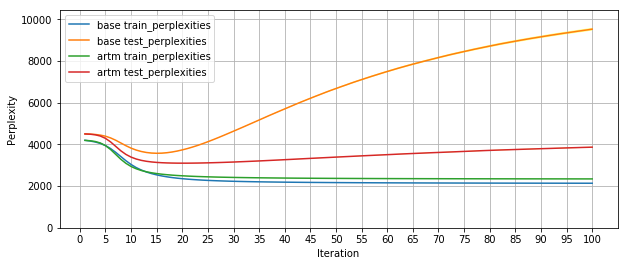

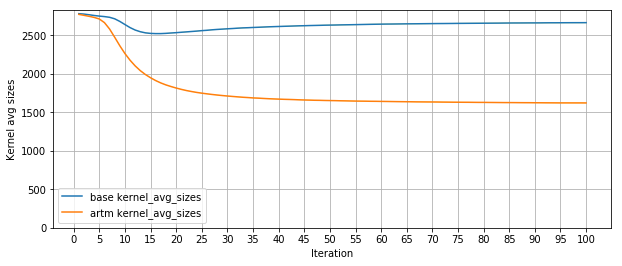

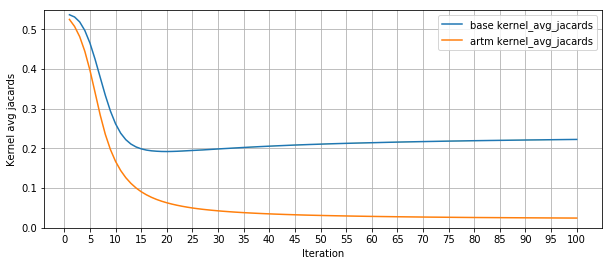

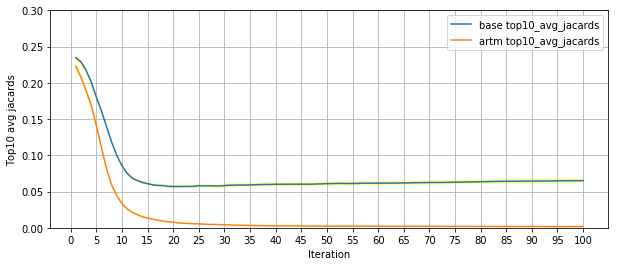

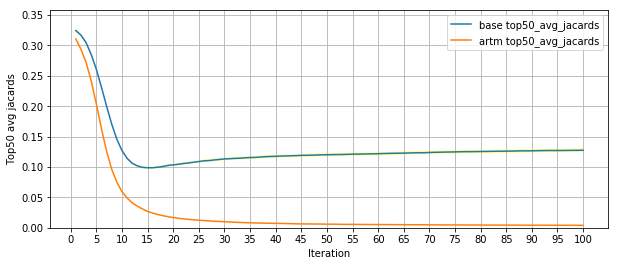

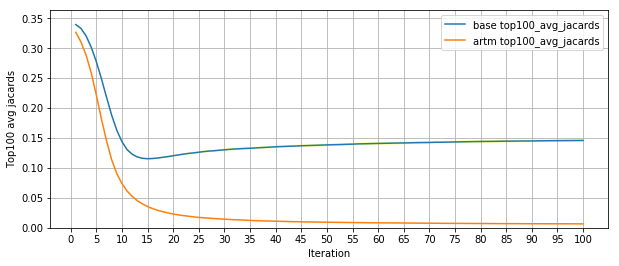

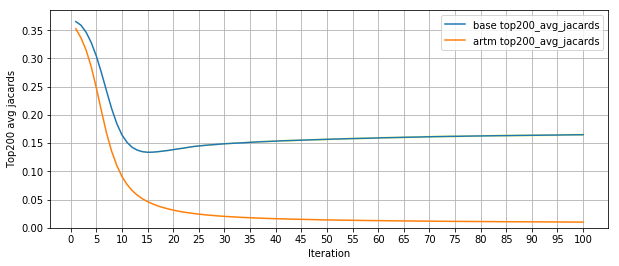

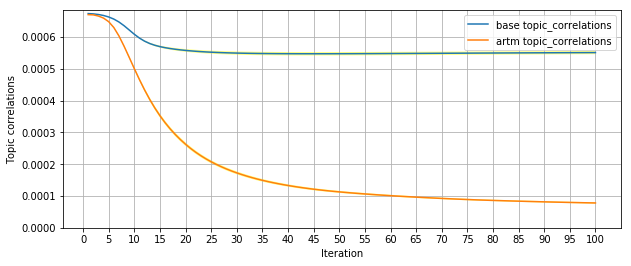

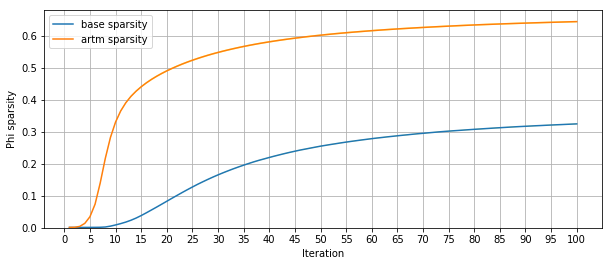

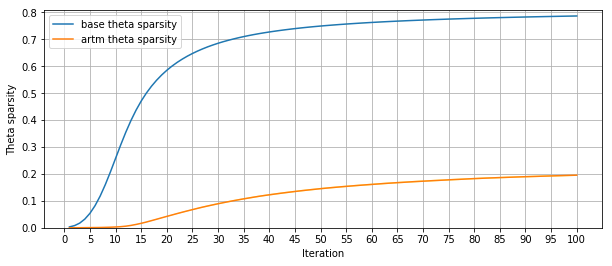

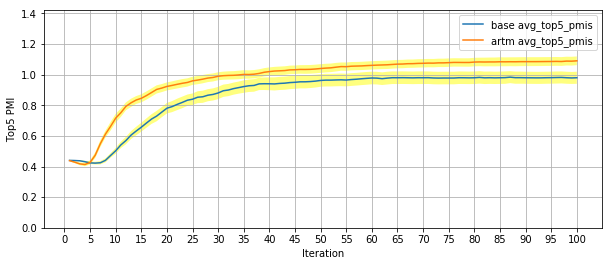

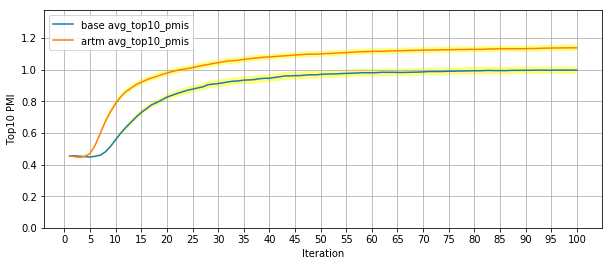

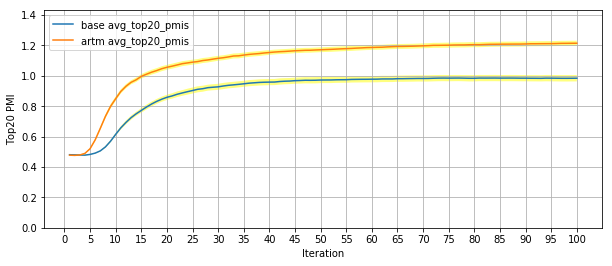

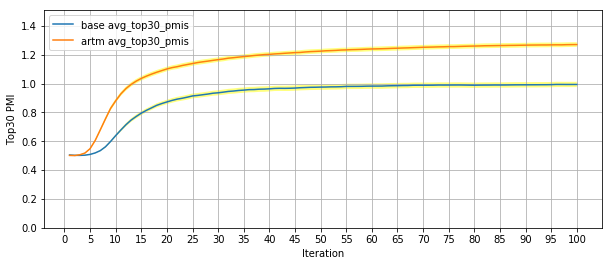

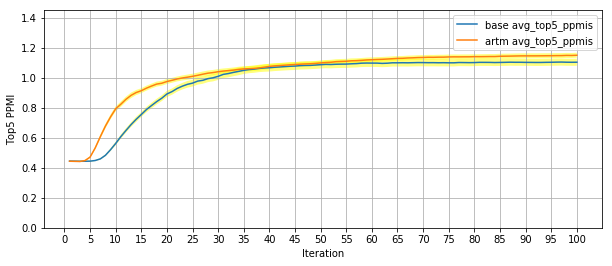

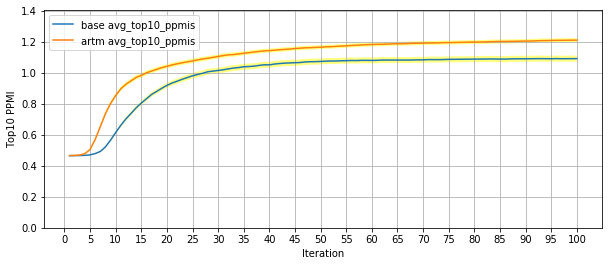

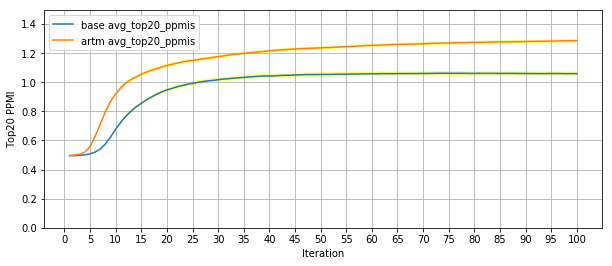

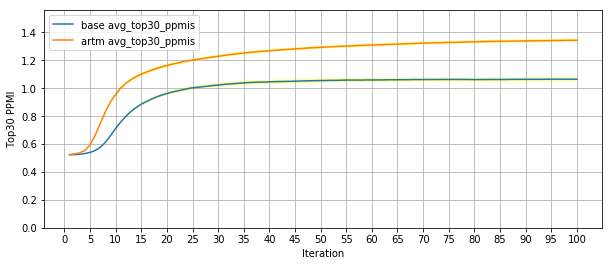

In [9]:
phi_experiment_res('20news_experiment/20news_10t_base_0_-0.1.pkl', '20news_experiment/20news_10t_artm_0_-0.1.pkl')

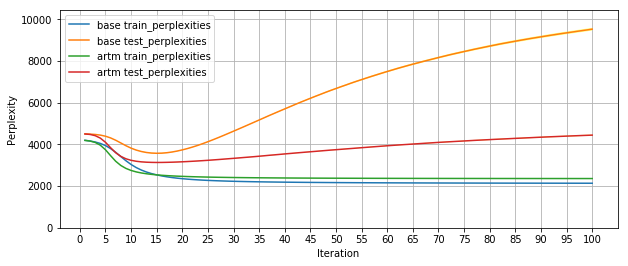

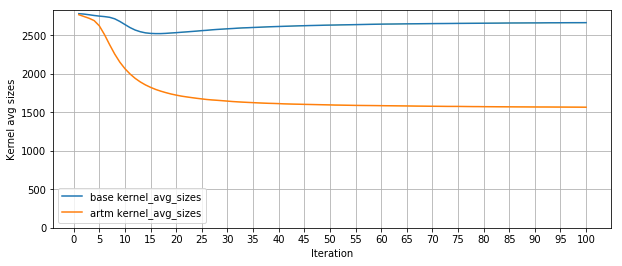

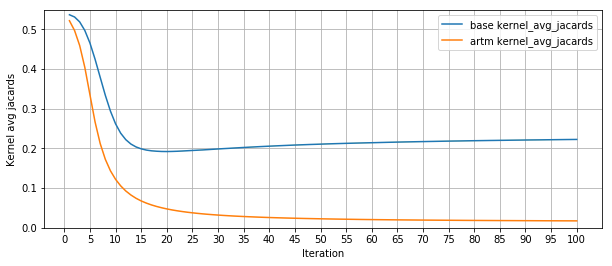

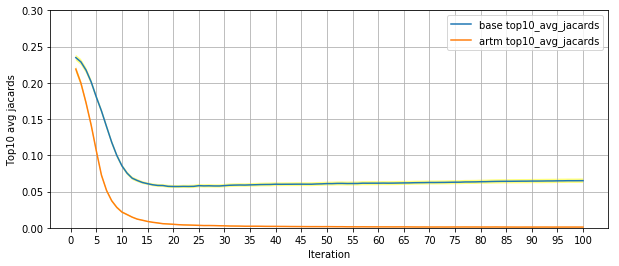

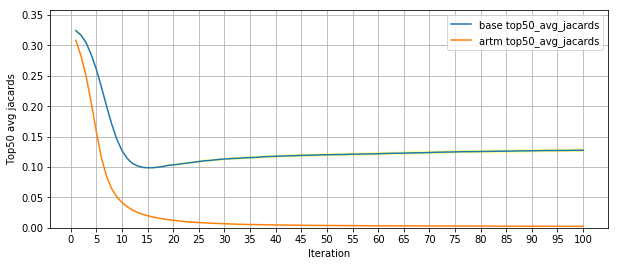

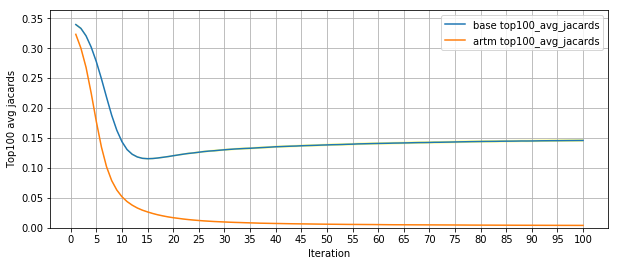

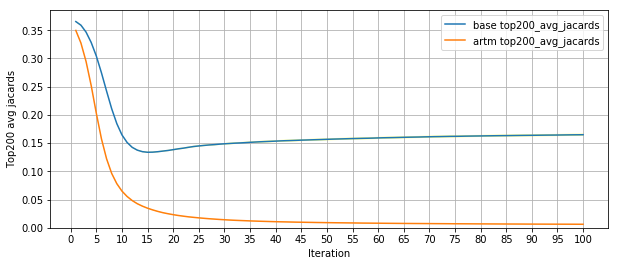

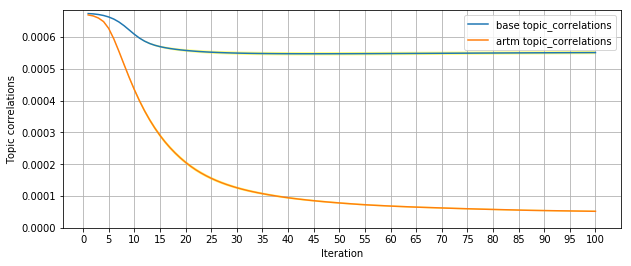

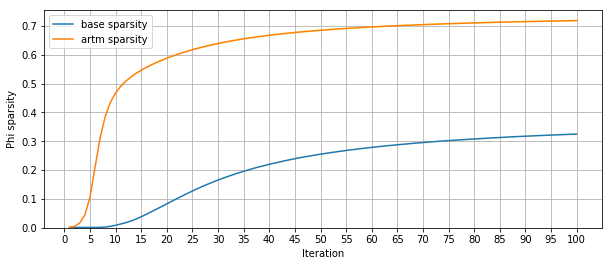

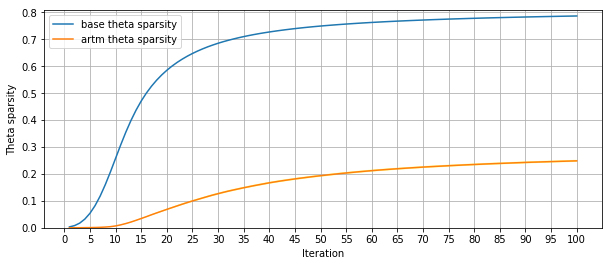

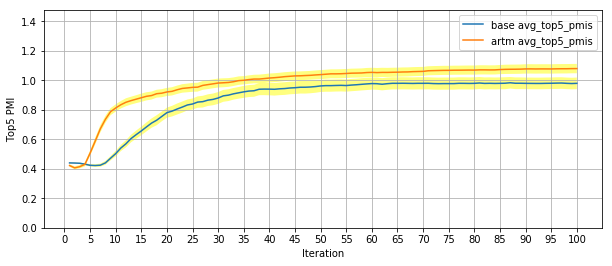

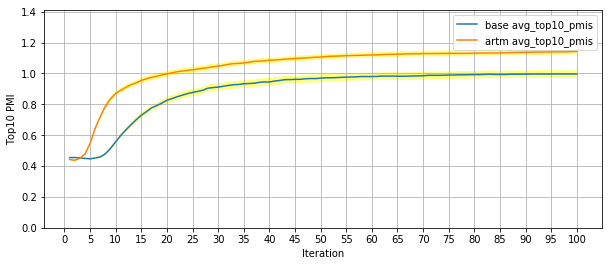

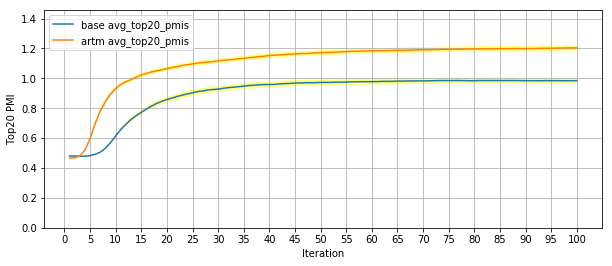

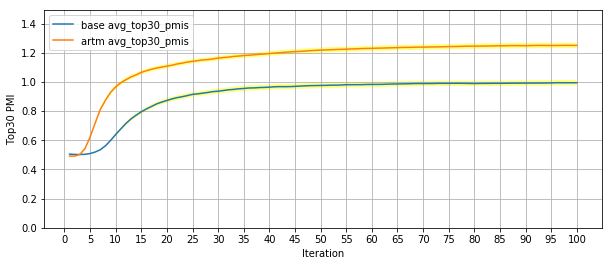

KeyError: 'avg_top5_ppmis'

In [10]:
phi_experiment_res('20news_experiment/20news_10t_base_0_-0.1.pkl', '20news_experiment/20news_10t_artm_0_-0.1_cheat.pkl')

# $T=25$

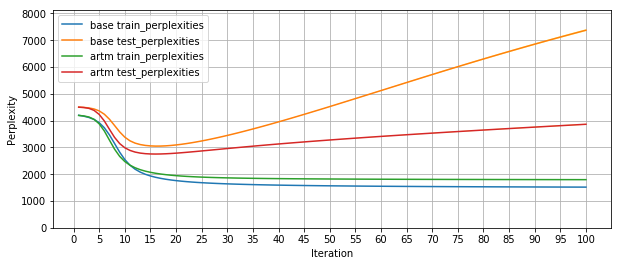

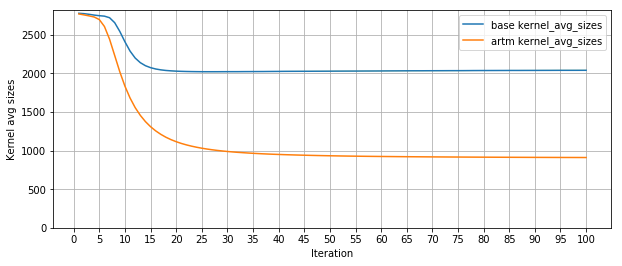

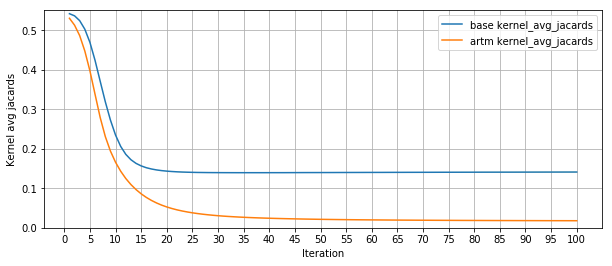

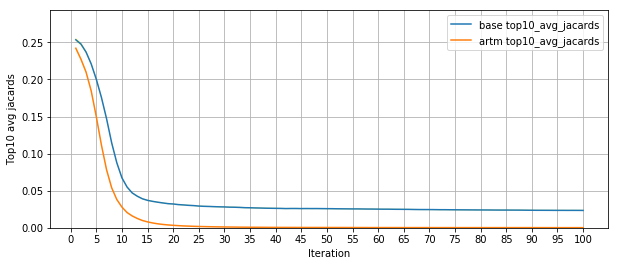

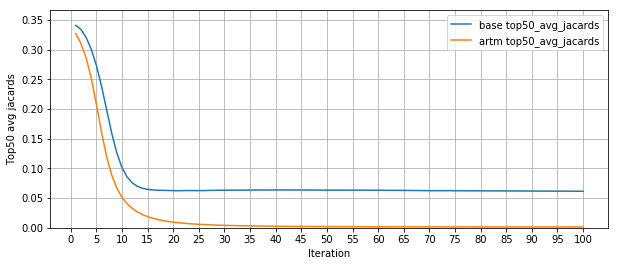

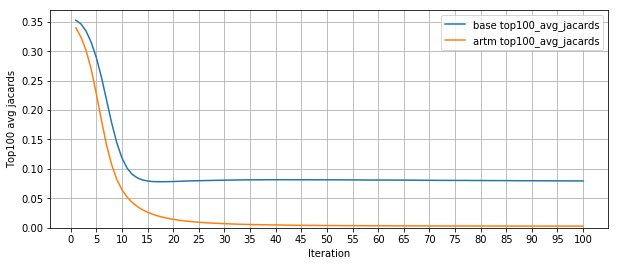

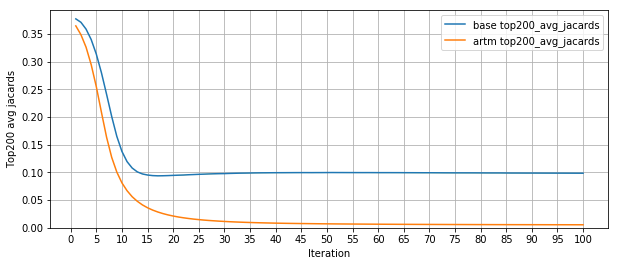

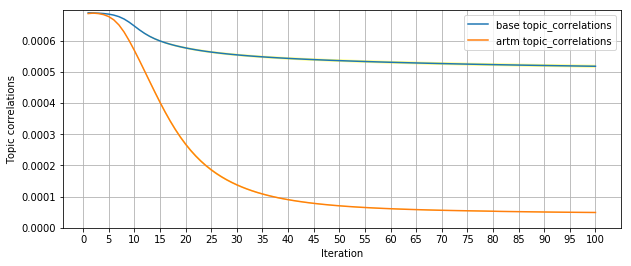

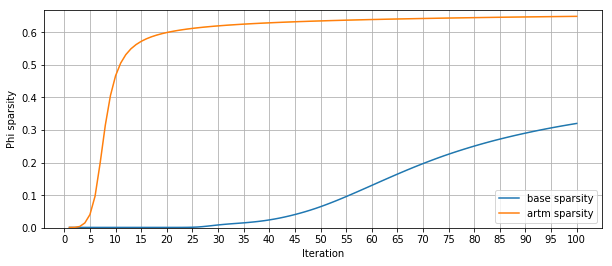

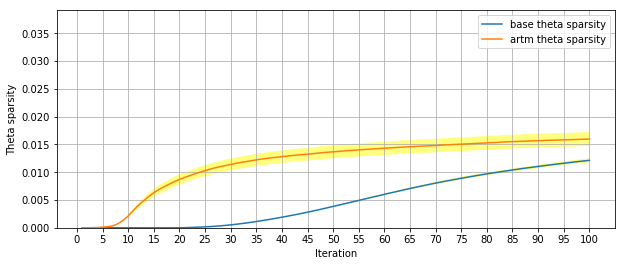

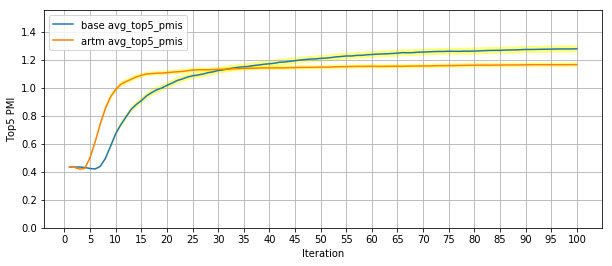

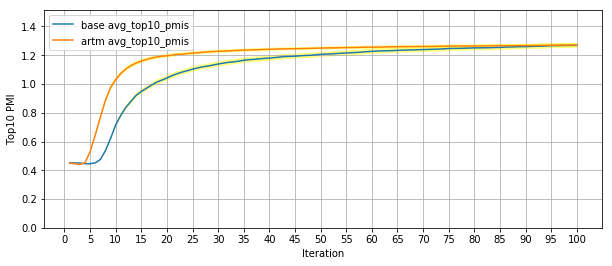

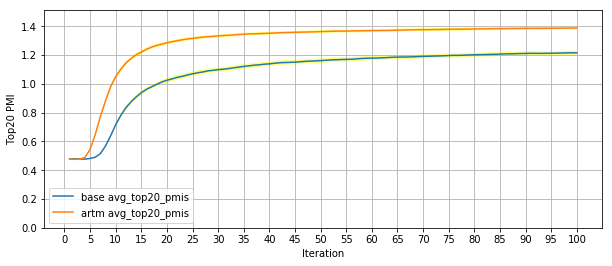

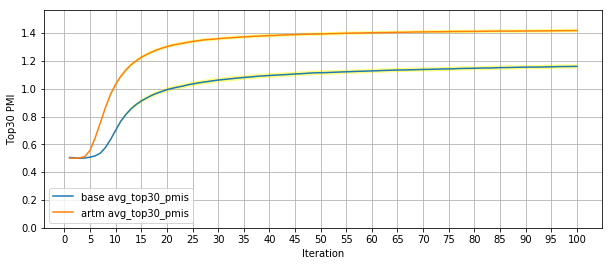

KeyError: 'avg_top5_ppmis'

In [11]:
phi_experiment_res('20news_experiment/20news_25t_base_0_0.pkl', '20news_experiment/20news_25t_artm_0_0.pkl')

In [ ]:
phi_experiment_res('20news_experiment/20news_25t_base_0_0.pkl', '20news_experiment/20news_25t_artm_0_0_cheat.pkl')

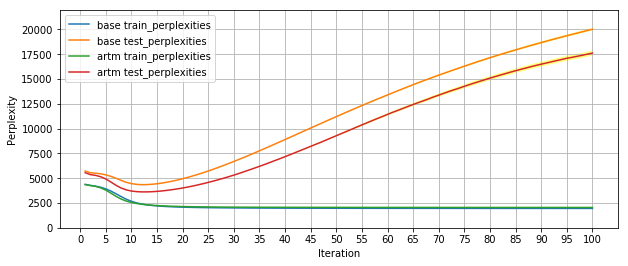

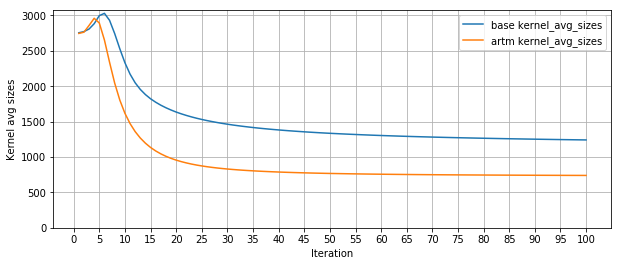

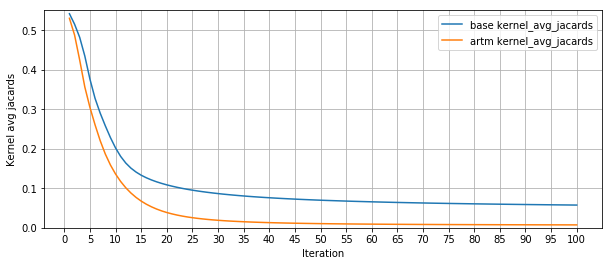

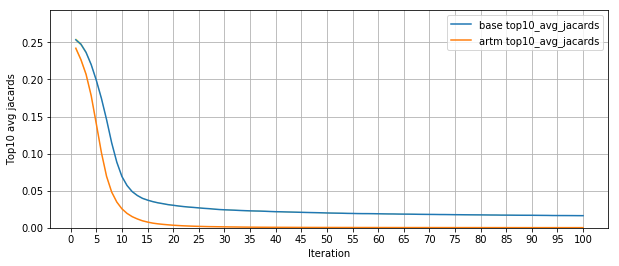

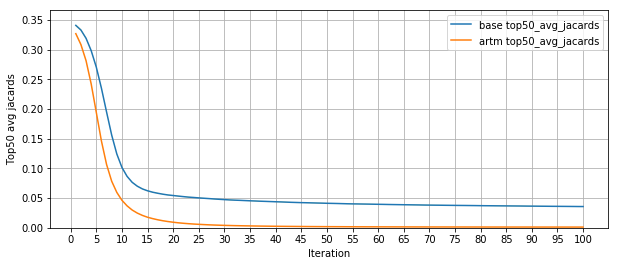

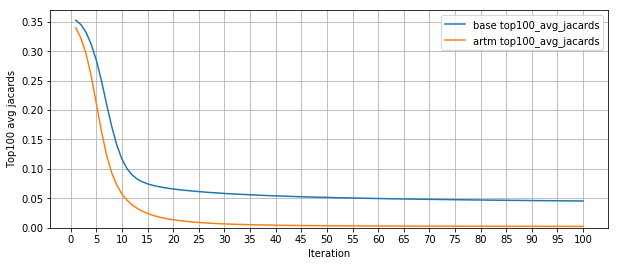

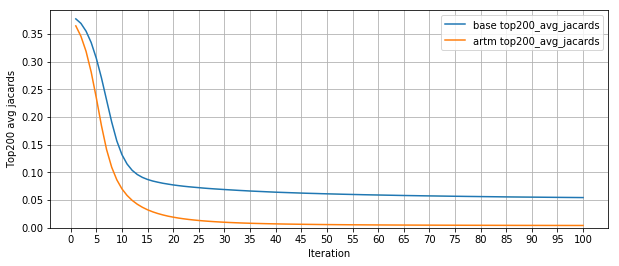

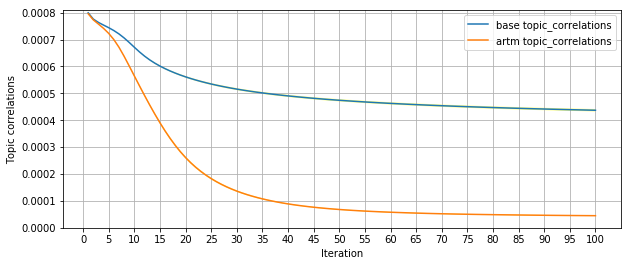

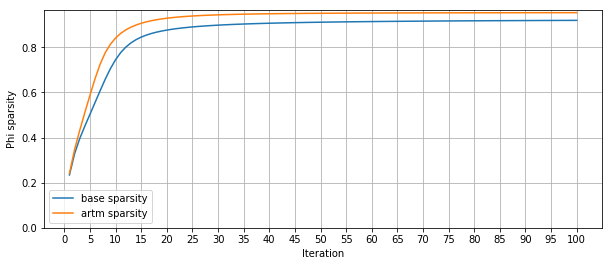

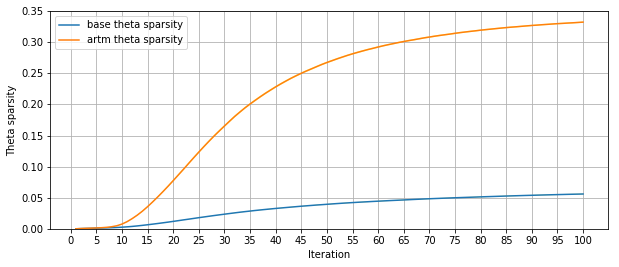

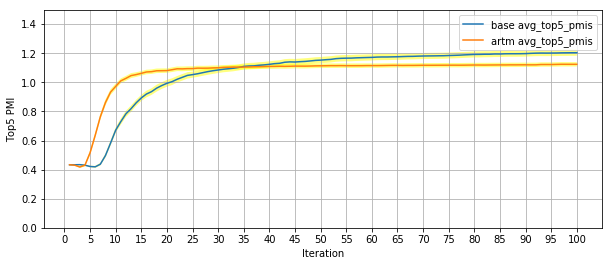

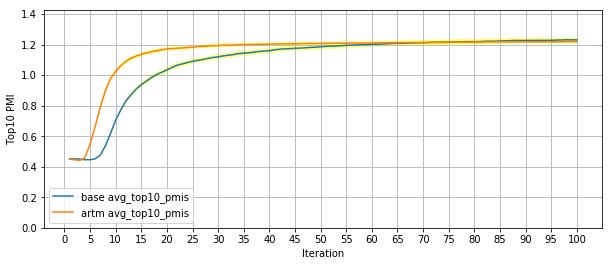

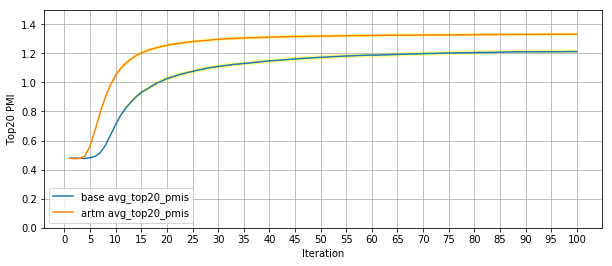

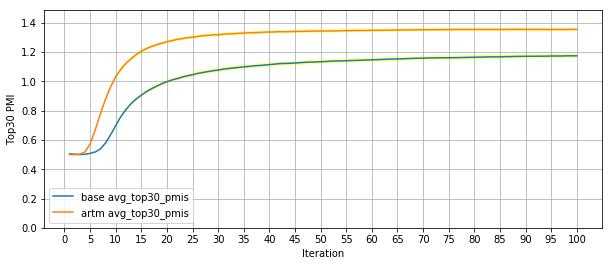

In [13]:
phi_experiment_res('20news_experiment/20news_25t_base_-0.1_0.pkl', '20news_experiment/20news_25t_artm_-0.1_0.pkl')

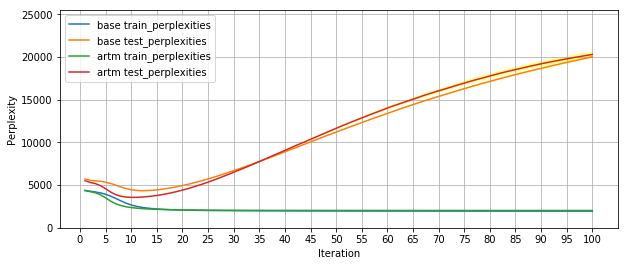

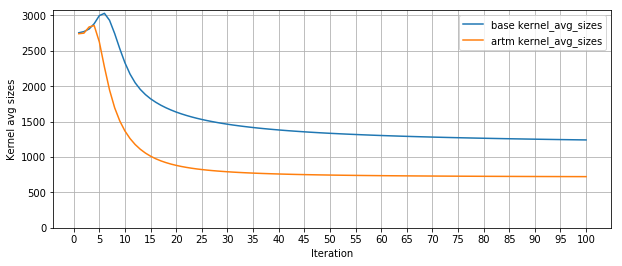

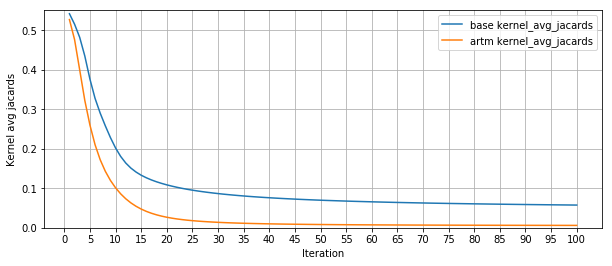

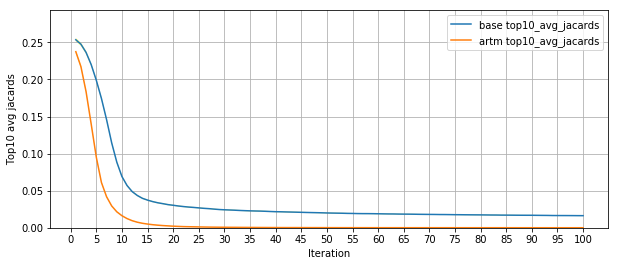

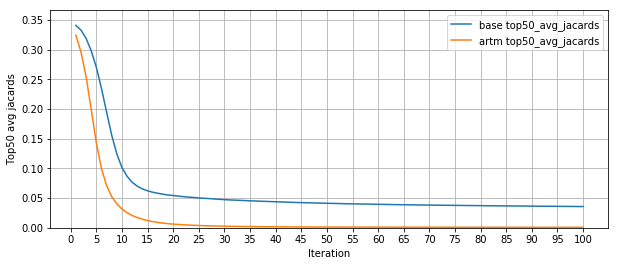

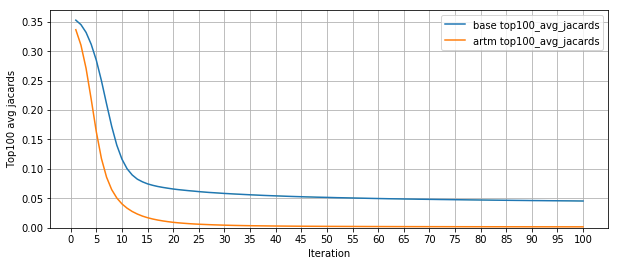

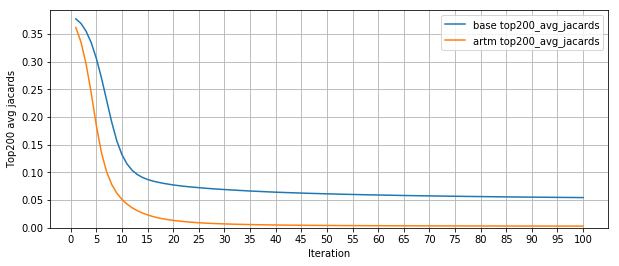

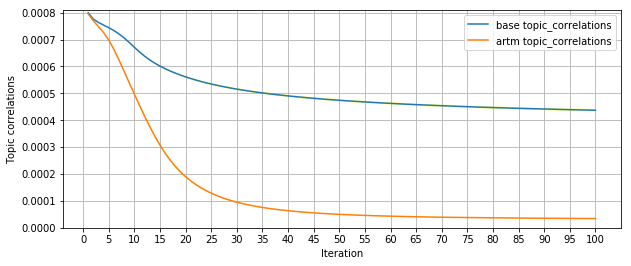

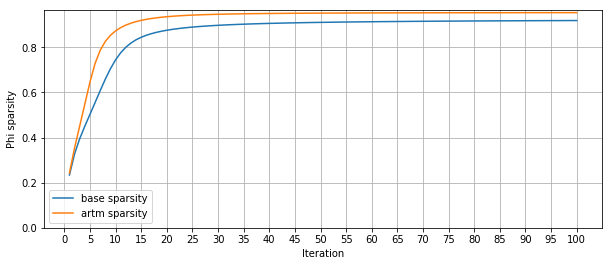

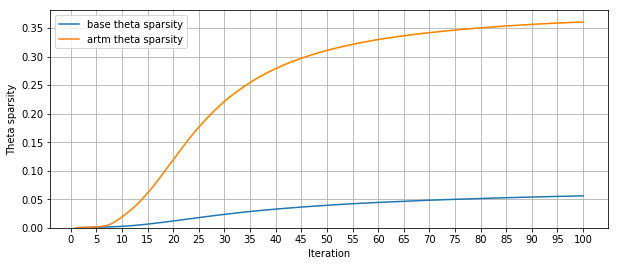

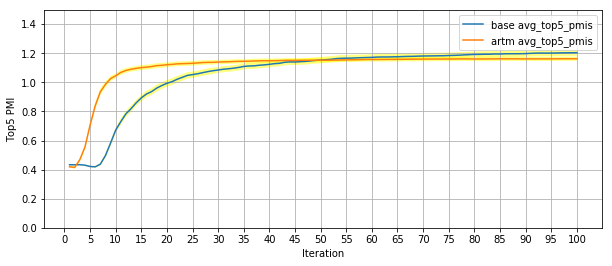

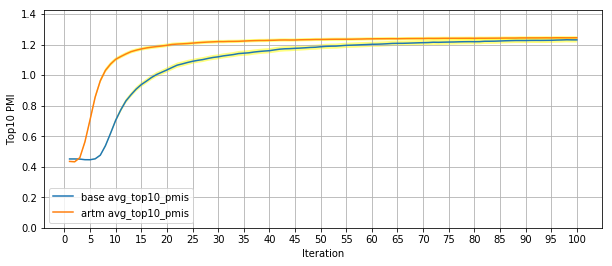

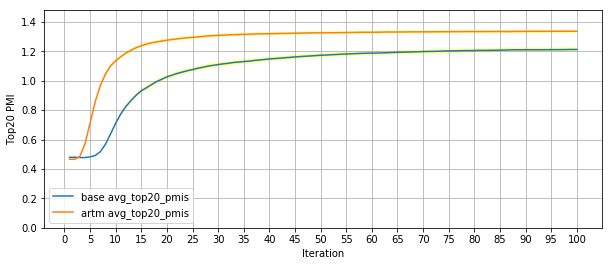

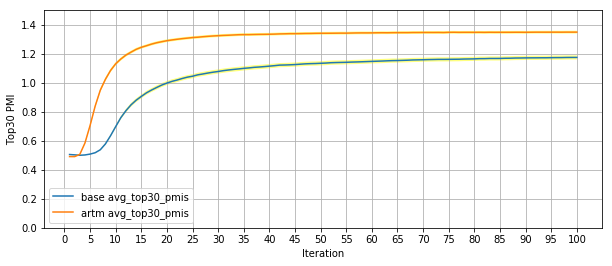

In [14]:
phi_experiment_res('20news_experiment/20news_25t_base_-0.1_0.pkl', '20news_experiment/20news_25t_artm_-0.1_0_cheat.pkl')

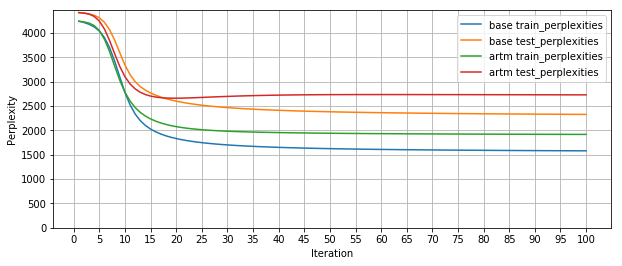

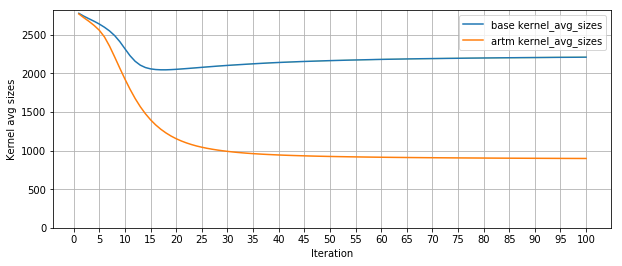

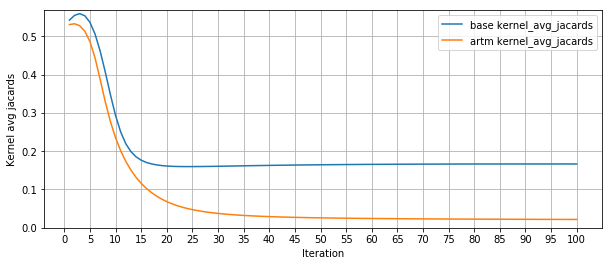

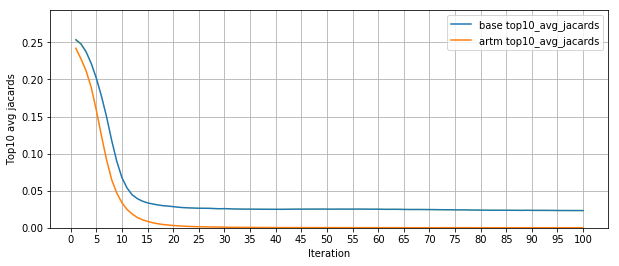

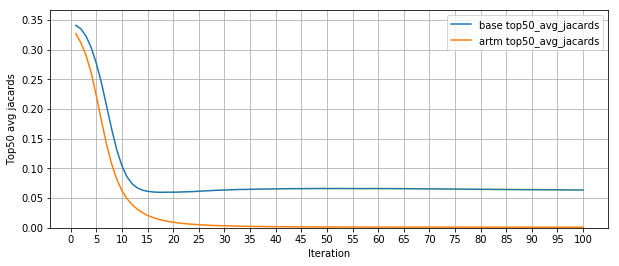

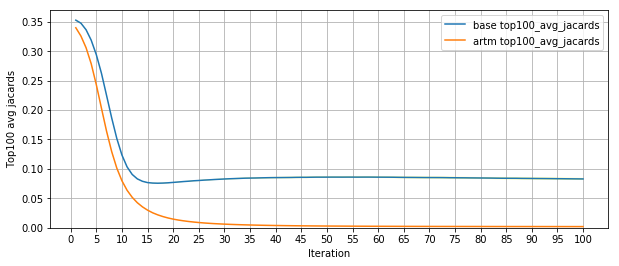

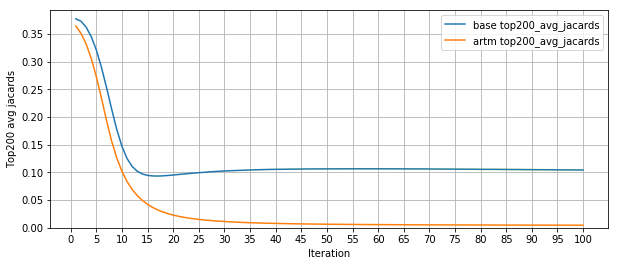

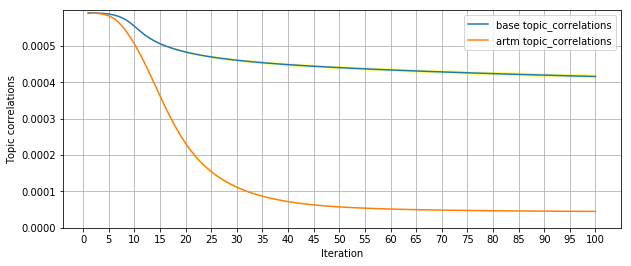

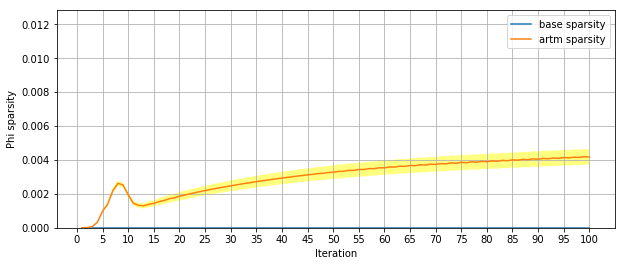

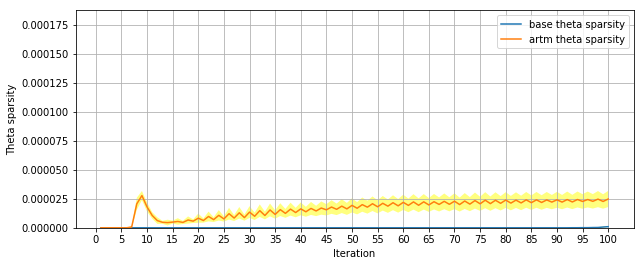

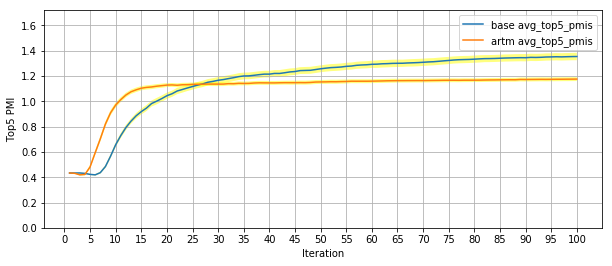

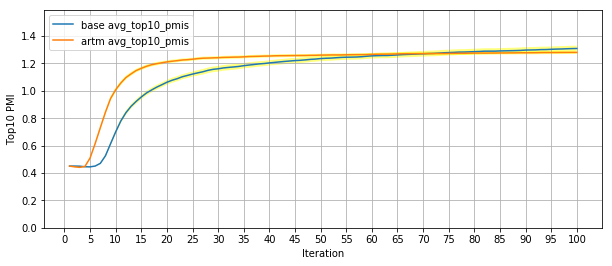

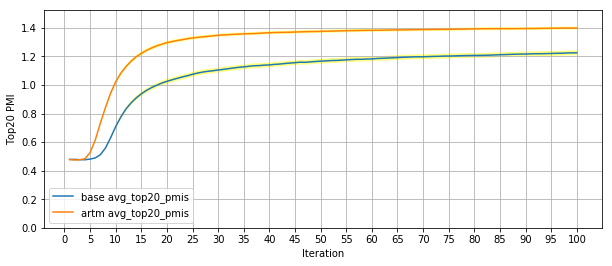

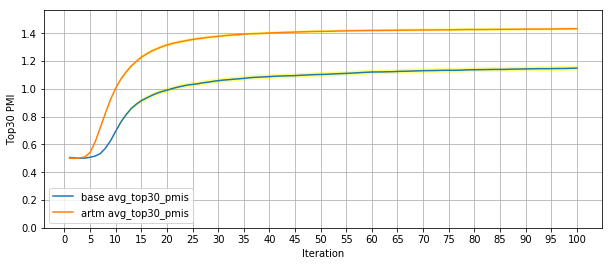

In [15]:
phi_experiment_res('20news_experiment/20news_25t_base_+0.1_0.pkl', '20news_experiment/20news_25t_artm_+0.1_0.pkl')

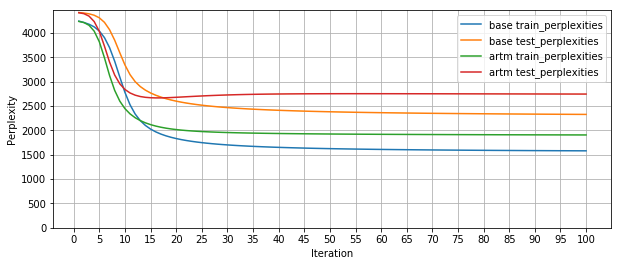

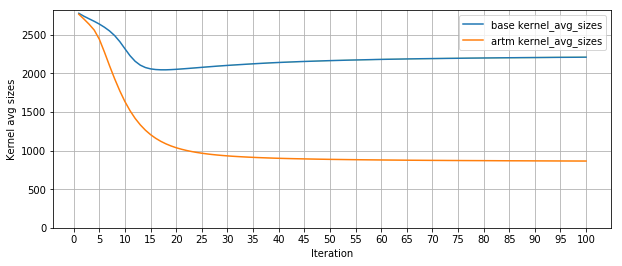

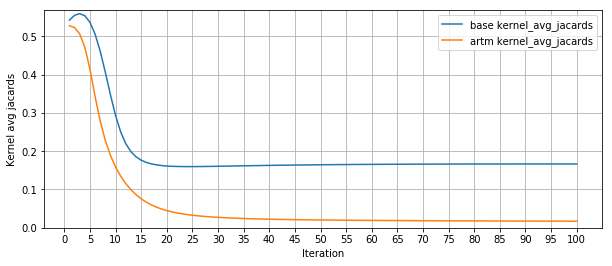

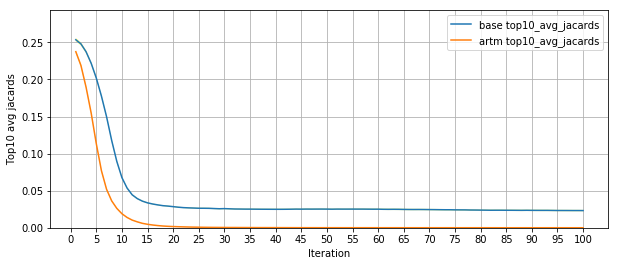

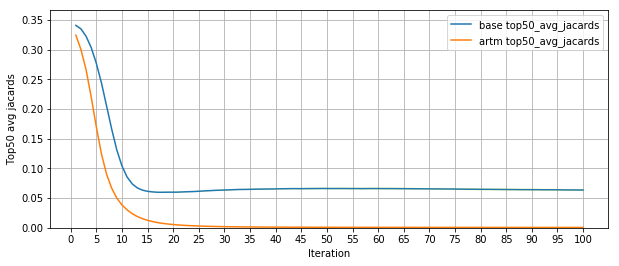

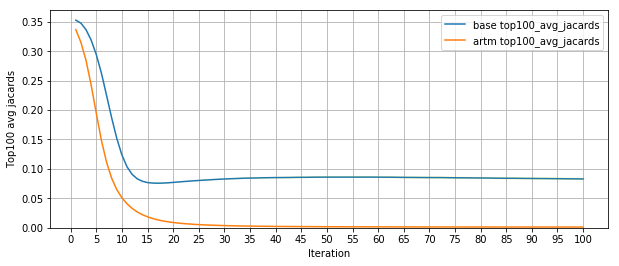

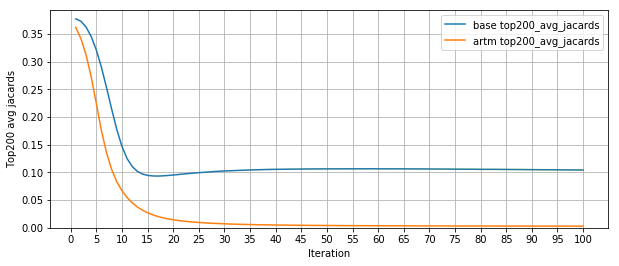

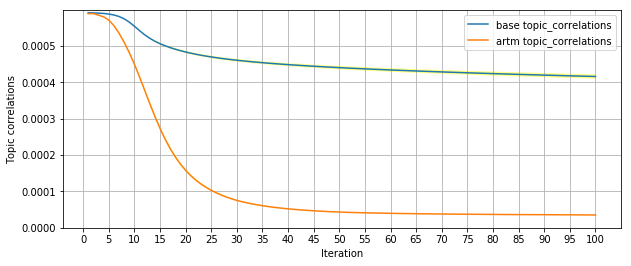

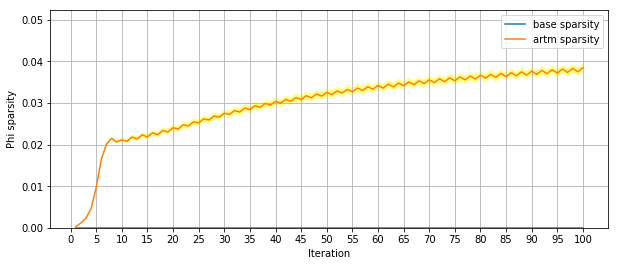

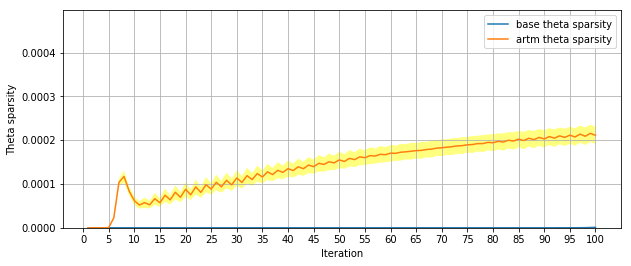

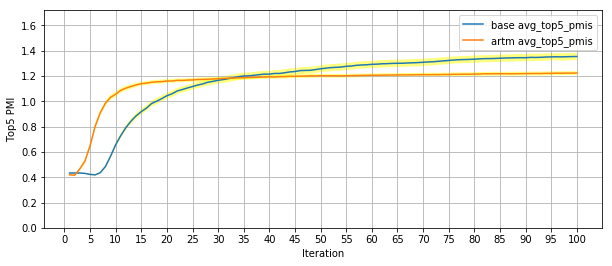

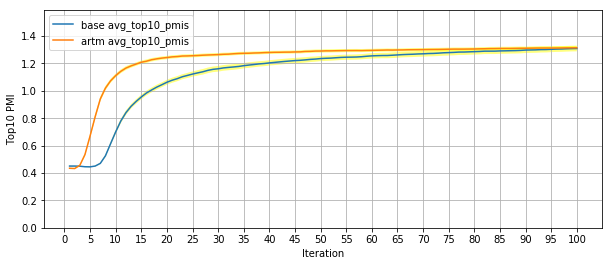

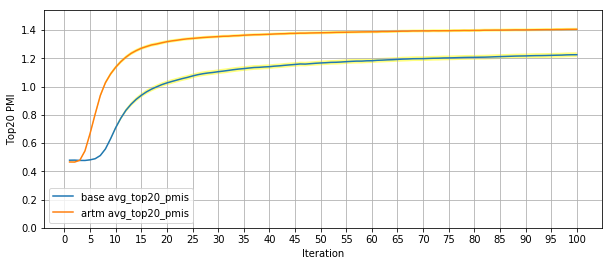

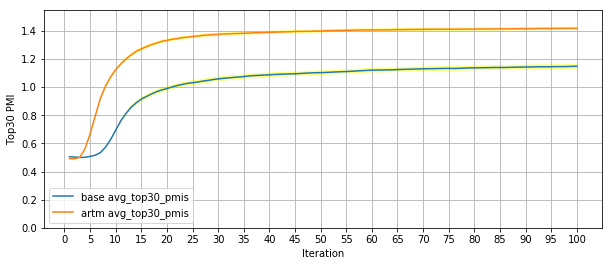

In [16]:
phi_experiment_res('20news_experiment/20news_25t_base_+0.1_0.pkl', '20news_experiment/20news_25t_artm_+0.1_0_cheat.pkl')

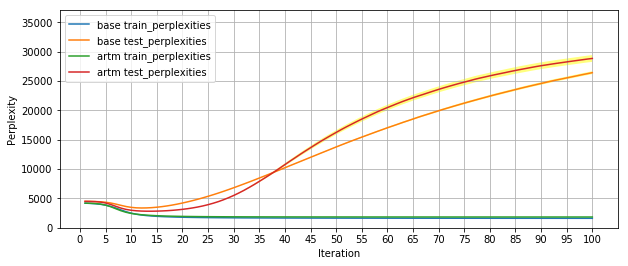

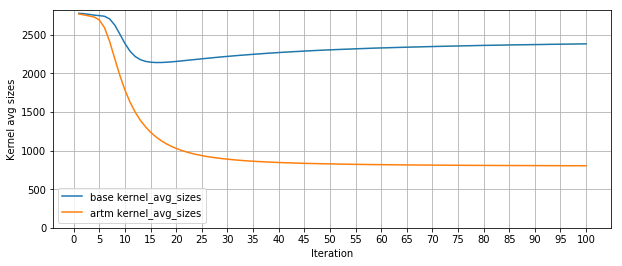

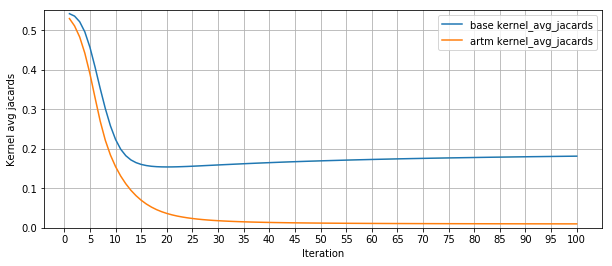

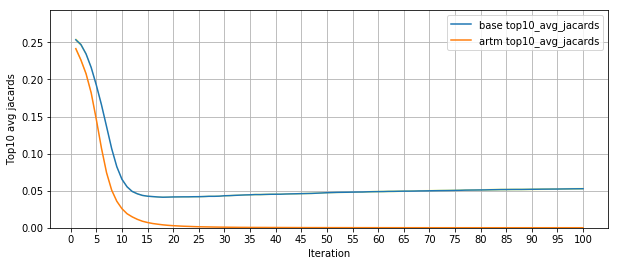

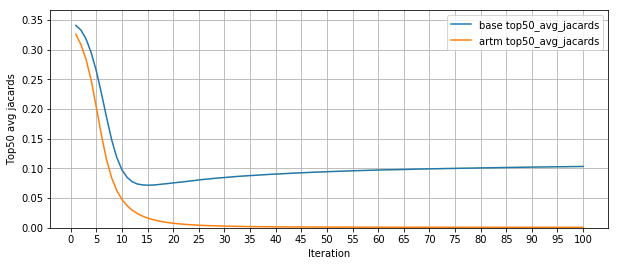

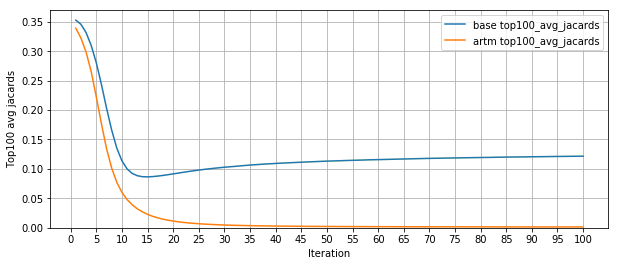

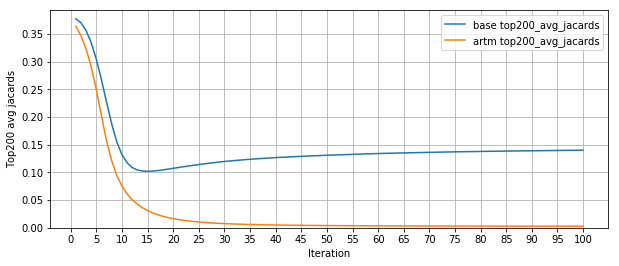

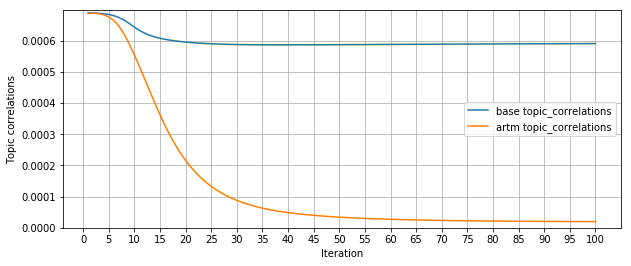

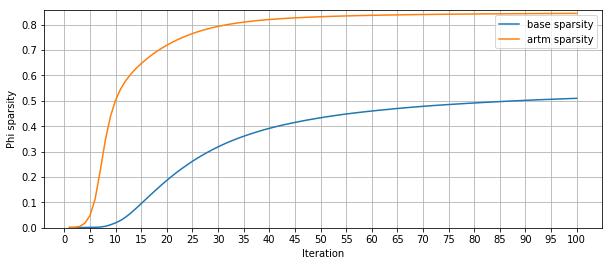

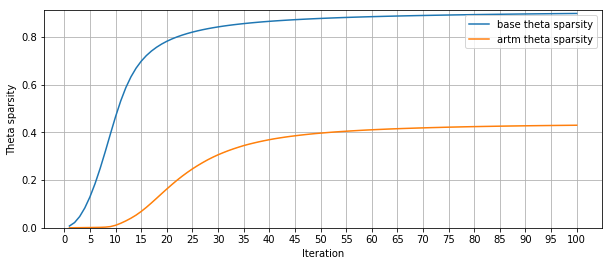

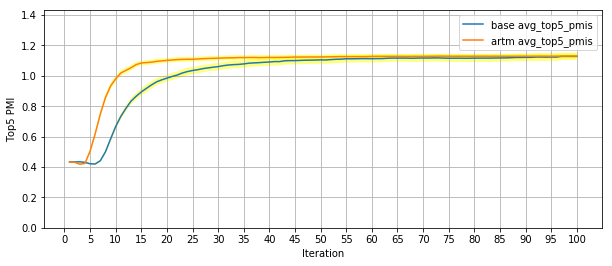

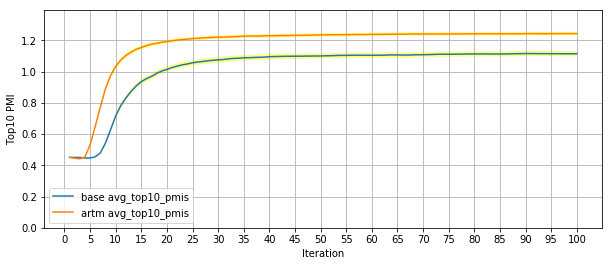

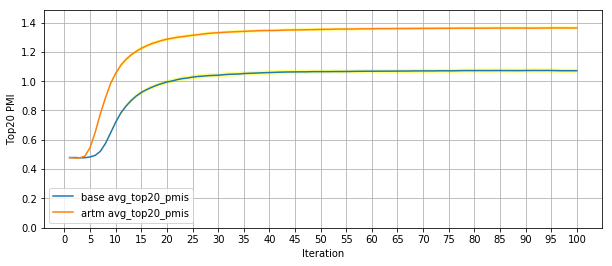

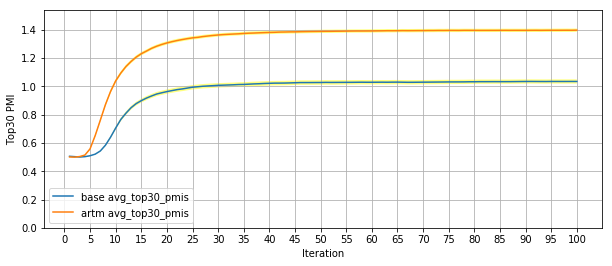

In [17]:
phi_experiment_res('20news_experiment/20news_25t_base_0_-0.1.pkl', '20news_experiment/20news_25t_artm_0_-0.1.pkl')

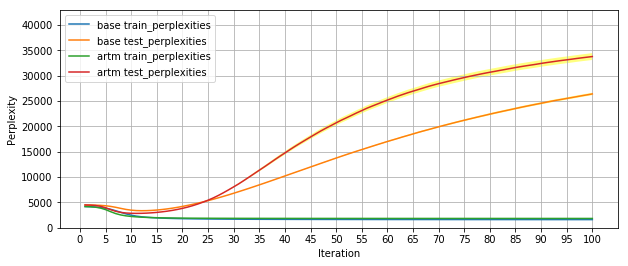

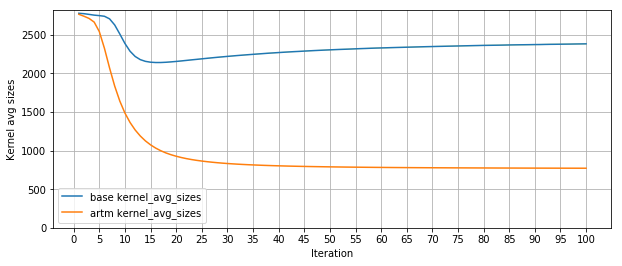

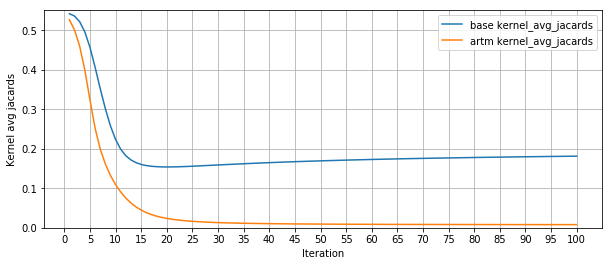

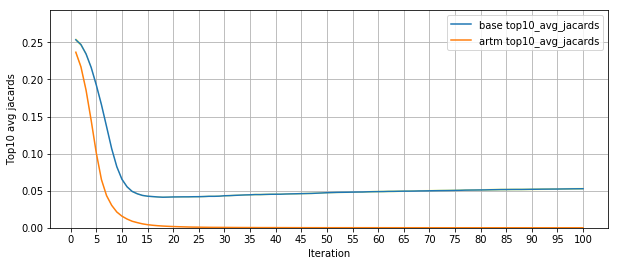

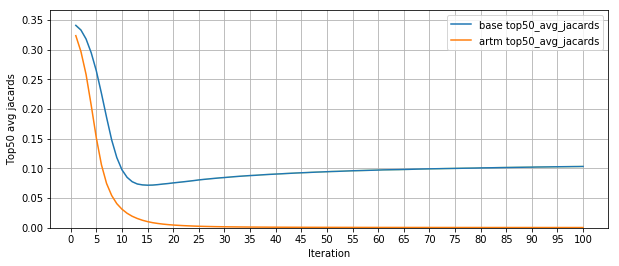

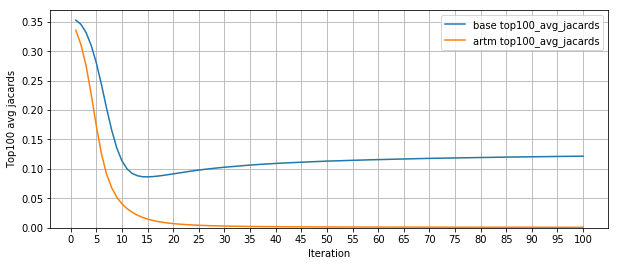

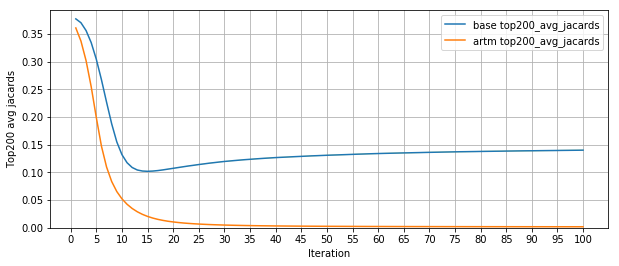

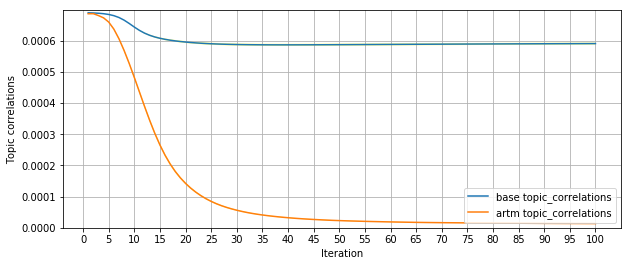

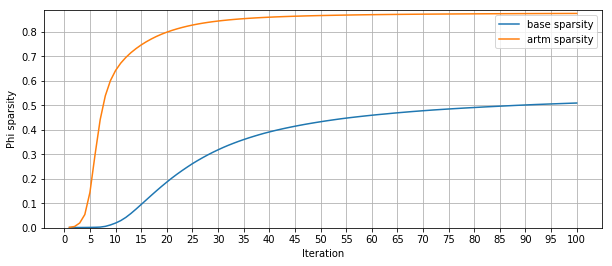

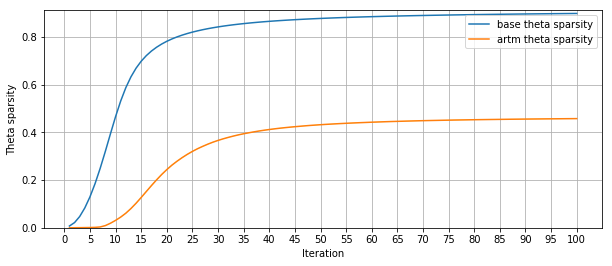

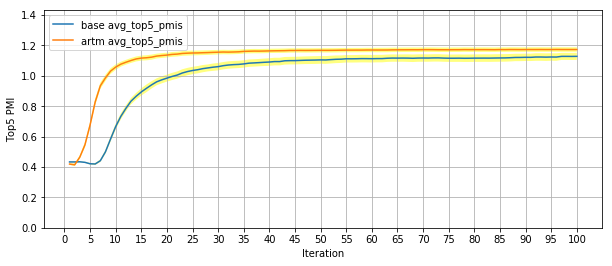

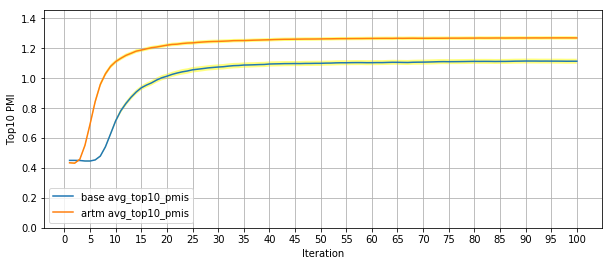

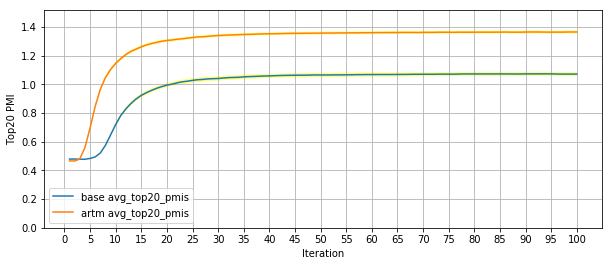

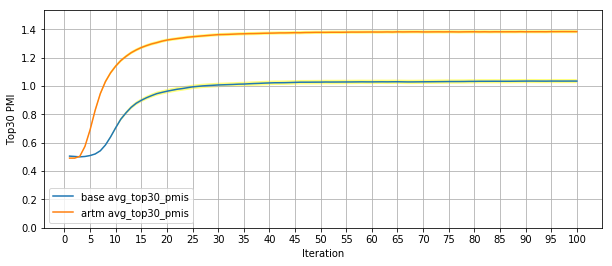

In [18]:
phi_experiment_res('20news_experiment/20news_25t_base_0_-0.1.pkl', '20news_experiment/20news_25t_artm_0_-0.1_cheat.pkl')

In [23]:
def estimate_mean(values, axis=None):
    values = np.array(values)
    samples = len(values) if axis is None else values.shape[axis]
    val = np.mean(values, axis=axis)
    err = 1.96 * np.std(values, axis=axis) / np.sqrt(samples)
    return val, err

def theta_plot((val, err)):
    iter_range = range(1, len(val) + 1)
    plt.plot(iter_range, val)
    #plt.fill_between(iter_range, val - err, val + err, alpha=0.5, facecolor='yellow')


def theta_experiment_res(path_base, path_artm, path_artm_cheat):
    d = {}
    with open(path_base, 'r') as f:
        d['base_res'] = pickle.load(f)
    with open(path_artm, 'r') as f:
        d['artm_res'] = pickle.load(f)
    with open(path_artm_cheat, 'r') as f:
        d['artm_cheat_res'] = pickle.load(f)
        
    print 'CV Fold'
    print '\t\t{}'.format(estimate_mean(d['base_res']['cv_fold_scores']))
    print '\t\t{}'.format(estimate_mean(d['artm_res']['cv_fold_scores']))
    print '\t\t{}'.format(estimate_mean(d['artm_cheat_res']['cv_fold_scores']))
    print 'CV Test'
    print '\t\t{}'.format(estimate_mean(d['base_res']['cv_test_scores']))
    print '\t\t{}'.format(estimate_mean(d['artm_res']['cv_test_scores']))
    print '\t\t{}'.format(estimate_mean(d['artm_cheat_res']['cv_test_scores']))
    
    fig = plt.figure(figsize=(16, 6))
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.grid()
    
    print 'Test'
    print '\tplsa_not_const_phi'
    theta_plot(estimate_mean(d['base_res']['res_plsa_not_const_phi'], axis=0))
    theta_plot(estimate_mean(d['artm_res']['res_plsa_not_const_phi'], axis=0))
    theta_plot(estimate_mean(d['artm_cheat_res']['res_plsa_not_const_phi'], axis=0))
    print '\tartm_thetaless'
    theta_plot(estimate_mean(d['base_res']['res_plsa_const_phi'], axis=0))
    theta_plot(estimate_mean(d['artm_res']['res_plsa_const_phi'], axis=0))
    theta_plot(estimate_mean(d['artm_cheat_res']['res_plsa_const_phi'], axis=0))
    print '\tartm_thetaless'
    theta_plot(estimate_mean(d['base_res']['res_artm_thetaless'], axis=0))
    theta_plot(estimate_mean(d['artm_res']['res_artm_thetaless'], axis=0))
    theta_plot(estimate_mean(d['artm_cheat_res']['res_artm_thetaless'], axis=0))
    
    plt.legend([
        'base_res plsa_not_const_phi',
        'artm_res plsa_not_const_phi',
        'artm_cheat_res plsa_not_const_phi',
        'base_res res_plsa_const_phi',
        'artm_res res_plsa_const_phi',
        'artm_cheat_res res_plsa_const_phi',
        'base_res res_artm_thetaless',
        'artm_res res_artm_thetaless',
        'artm_cheat_res res_artm_thetaless'
    ])
    plt.show()
 

CV Fold
		(0.67386059690277156, 0.0020254212135716208)
		(0.68508417411087819, 0.0017167636710787731)
		(0.67725124004805926, 0.0016712306307769798)
CV Test
		(0.67590224475018101, 0.0020868740542749446)
		(0.68339898624185369, 0.0017880040408199411)
		(0.67549094858797976, 0.0017156501209979406)
Test
	plsa_not_const_phi
	artm_thetaless
	artm_thetaless


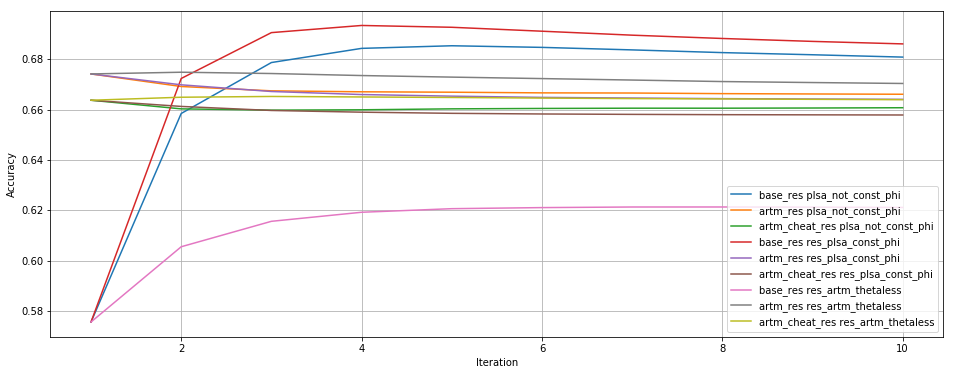

In [24]:
theta_experiment_res(
    '20news_doc_experiment/docs_20news_10t_base_0_0.pkl', 
    '20news_doc_experiment/docs_20news_10t_artm_0_0.pkl',
    '20news_doc_experiment/docs_20news_10t_artm_0_0_cheat.pkl'
)

CV Fold
		(0.61096226941215415, 0.0014224767670132997)
		(0.6271955693196285, 0.0014314783050819366)
		(0.62705850939856889, 0.0014386740248887311)
CV Test
		(0.61540115858073863, 0.0014991041143692784)
		(0.63021071687183206, 0.001503521053381003)
		(0.62889790007241131, 0.0015059453233307873)
Test
	plsa_not_const_phi
	artm_thetaless
	artm_thetaless


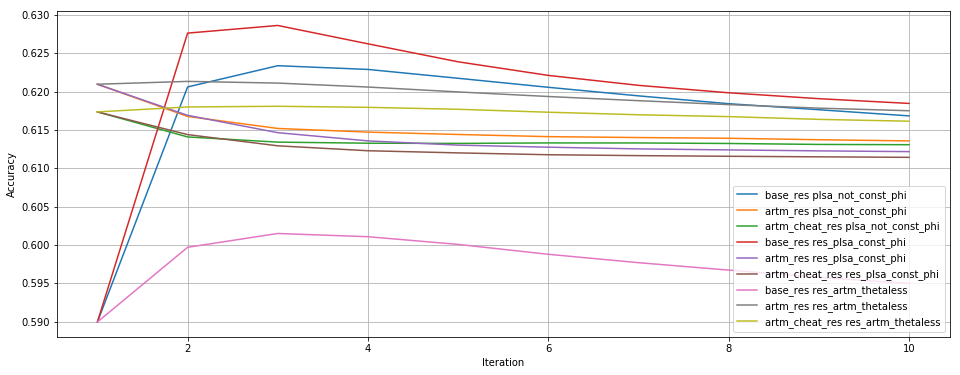

In [25]:
theta_experiment_res(
    '20news_doc_experiment/docs_20news_10t_base_-0.1_0.pkl', 
    '20news_doc_experiment/docs_20news_10t_artm_-0.1_0.pkl',
    '20news_doc_experiment/docs_20news_10t_artm_-0.1_0_cheat.pkl'
)

CV Fold
		(0.56677362350277216, 0.0017909645247623461)
		(0.67868778535018714, 0.0016929323155673282)
		(0.67004937527191255, 0.0016574667710052937)
CV Test
		(0.57230485155684274, 0.0018905150016946426)
		(0.67799131064446061, 0.0017713521593450976)
		(0.6692787834902244, 0.0017196429280489538)
Test
	plsa_not_const_phi
	artm_thetaless
	artm_thetaless


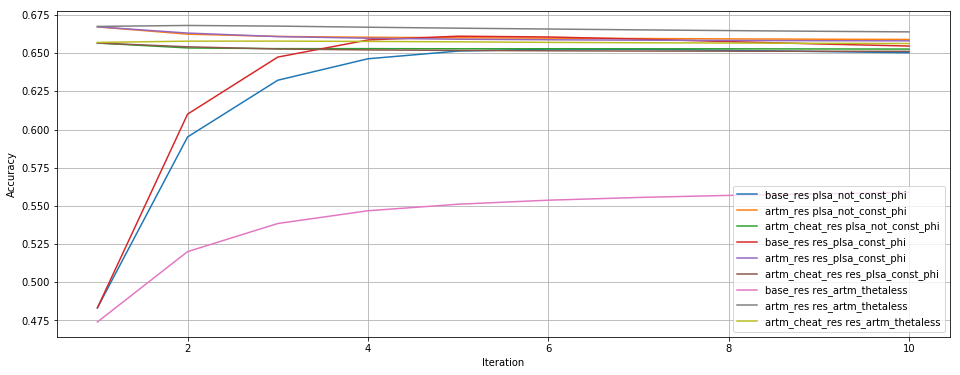

In [26]:
theta_experiment_res(
    '20news_doc_experiment/docs_20news_10t_base_0_-0.1.pkl', 
    '20news_doc_experiment/docs_20news_10t_artm_0_-0.1.pkl',
    '20news_doc_experiment/docs_20news_10t_artm_0_-0.1_cheat.pkl'
)

CV Fold
		(0.72057553030157939, 0.0012147650695586854)
		(0.75621061710769977, 0.0011560843768523728)
		(0.75031940494827498, 0.0011437992574537975)
CV Test
		(0.73031281679942073, 0.0013450975788369011)
		(0.7587096307023895, 0.00127440563682578)
		(0.75328095582910926, 0.0012527729969279105)
Test
	plsa_not_const_phi
	artm_thetaless
	artm_thetaless


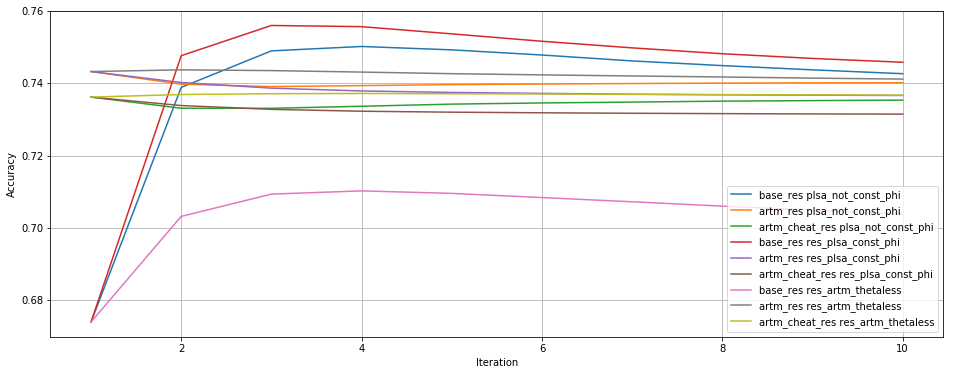

In [27]:
theta_experiment_res(
    '20news_doc_experiment/docs_20news_25t_base_0_0.pkl', 
    '20news_doc_experiment/docs_20news_25t_artm_0_0.pkl',
    '20news_doc_experiment/docs_20news_25t_artm_0_0_cheat.pkl'
)

CV Fold
		(0.5965991784362229, 0.0011984717827223438)
		(0.74254868487614045, 0.0011115911705706629)
		(0.73643180782348894, 0.0010582513404257402)
CV Test
		(0.60749891383055754, 0.0013313928251379951)
		(0.74483490224475024, 0.0012156239562071984)
		(0.73880376538740045, 0.0011897720552056408)
Test
	plsa_not_const_phi
	artm_thetaless
	artm_thetaless


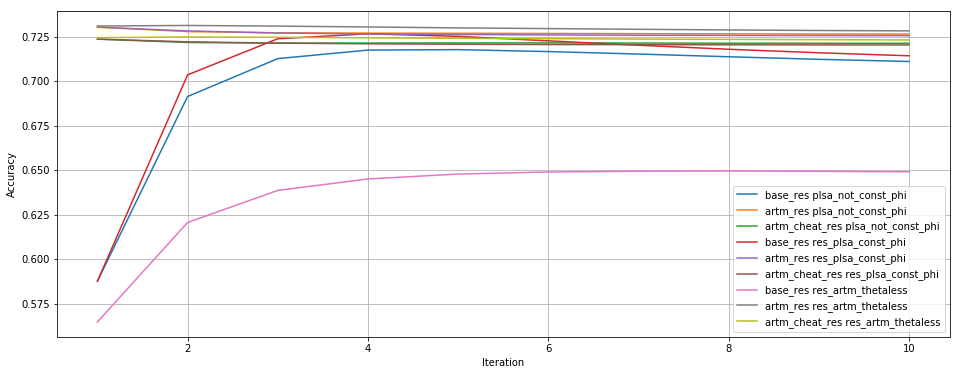

In [30]:
theta_experiment_res(
    '20news_doc_experiment/docs_20news_25t_base_0_-0.1.pkl', 
    '20news_doc_experiment/docs_20news_25t_artm_0_-0.1.pkl',
    '20news_doc_experiment/docs_20news_25t_artm_0_-0.1_cheat.pkl'
)

In [ ]:
base_list = [
    './thetaless_exp/{tag}/{tag}_base_0_0.pkl',
    './thetaless_exp/{tag}/{tag}_base_+0.1_0.pkl',
    './thetaless_exp/{tag}/{tag}_base_-0.1_0.pkl',
    './thetaless_exp/{tag}/{tag}_base_0_-0.1.pkl'
]
tartm_list = [
    './thetaless_exp/{tag}/{tag}_artm_0_0.pkl',
    './thetaless_exp/{tag}/{tag}_artm_+0.1_0.pkl',
    './thetaless_exp/{tag}/{tag}_artm_-0.1_0.pkl',
    './thetaless_exp/{tag}/{tag}_artm_0_-0.1.pkl'
]
tartm_mod_list = [
    './thetaless_exp/{tag}/{tag}_artm_0_0_cheat.pkl',
    './thetaless_exp/{tag}/{tag}_artm_+0.1_0_cheat.pkl',
    './thetaless_exp/{tag}/{tag}_artm_-0.1_0_cheat.pkl',
    './thetaless_exp/{tag}/{tag}_artm_0_-0.1_cheat.pkl'
]

In [ ]:
def helper(target_value, pathes, agg_func, tag):
    res = []
    for path in pathes:
        with open(path.format(tag=tag), 'r') as f:
            values = pickle.load(f)[target_value]
            res.append(np.mean(values, axis=0))
    return agg_func(res)


def compare(target_value, agg_func, tag):
    plsa_res = helper(target_value, base_list, agg_func, tag)
    tartm_res = helper(target_value, tartm_list, agg_func, tag)
    tartm_mod_res = helper(target_value, tartm_mod_list, agg_func, tag)
    
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1,1,1)
    major_ticks = np.arange(0, 101, 5)
    ax.set_xticks(major_ticks)   
    #plt.ylim(0., np.max(values_list) * 1.01)
    
    plt.plot(plsa_res)
    plt.plot(tartm_res)
    plt.plot(tartm_mod_res)
    
    plt.xlabel('Iteration')
    plt.ylabel(target_value)
    plt.legend(['plsa', 'TARTM', 'mTARTM'])
    plt.grid()
    
    plt.savefig('{}_{}.eps'.format(tag, target_value), format="eps")
    plt.show()

In [ ]:
font = {
    'family' : 'normal',
    'size'   : 14
}

plt.rc('font', **font)

In [ ]:
compare('avg_top10_pmis', lambda x: np.max(x, axis=0), '20news_25t')
compare('avg_top20_pmis', lambda x: np.max(x, axis=0), '20news_25t')
compare('test_perplexities', lambda x: np.min(x, axis=0), '20news_25t')
compare('sparsities', lambda x: np.max(x, axis=0), '20news_25t')
compare('kernel_avg_jacards', lambda x: np.min(x, axis=0), '20news_25t')
compare('kernel_avg_sizes', lambda x: np.min(x, axis=0), '20news_25t')

In [ ]:
compare('avg_top10_pmis', lambda x: np.max(x, axis=0), '20news_10t')
compare('avg_top20_pmis', lambda x: np.max(x, axis=0), '20news_10t')
compare('test_perplexities', lambda x: np.min(x, axis=0), '20news_10t')
compare('sparsities', lambda x: np.max(x, axis=0), '20news_10t')
compare('kernel_avg_jacards', lambda x: np.min(x, axis=0), '20news_10t')
compare('kernel_avg_sizes', lambda x: np.min(x, axis=0), '20news_10t')

In [ ]:
def estimate_mean(values, axis=None):
    values = np.array(values)
    samples = len(values) if axis is None else values.shape[axis]
    val = np.mean(values, axis=axis)
    err = 1.96 * np.std(values, axis=axis) / np.sqrt(samples)
    return val, err

def theta_plot((val, err)):
    iter_range = range(1, len(val) + 1)
    plt.plot(iter_range, val)
    #plt.fill_between(iter_range, val - err, val + err, alpha=0.5, facecolor='yellow')


def theta_experiment_res(path_base, path_artm, path_artm_cheat):
    d = {}
    with open(path_base, 'r') as f:
        d['base_res'] = pickle.load(f)
    with open(path_artm, 'r') as f:
        d['artm_res'] = pickle.load(f)
    with open(path_artm_cheat, 'r') as f:
        d['artm_cheat_res'] = pickle.load(f)
        
    print 'CV Fold'
    print '\t\t{}'.format(estimate_mean(d['base_res']['cv_fold_scores']))
    print '\t\t{}'.format(estimate_mean(d['artm_res']['cv_fold_scores']))
    print '\t\t{}'.format(estimate_mean(d['artm_cheat_res']['cv_fold_scores']))
    print 'CV Test'
    print '\t\t{}'.format(estimate_mean(d['base_res']['cv_test_scores']))
    print '\t\t{}'.format(estimate_mean(d['artm_res']['cv_test_scores']))
    print '\t\t{}'.format(estimate_mean(d['artm_cheat_res']['cv_test_scores']))
    
    fig = plt.figure(figsize=(16, 6))
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.grid()
    
    print 'Test'
    print '\tplsa_not_const_phi'
    theta_plot(estimate_mean(d['base_res']['res_plsa_not_const_phi'], axis=0))
    theta_plot(estimate_mean(d['artm_res']['res_plsa_not_const_phi'], axis=0))
    theta_plot(estimate_mean(d['artm_cheat_res']['res_plsa_not_const_phi'], axis=0))
    print '\tartm_thetaless'
    theta_plot(estimate_mean(d['base_res']['res_plsa_const_phi'], axis=0))
    theta_plot(estimate_mean(d['artm_res']['res_plsa_const_phi'], axis=0))
    theta_plot(estimate_mean(d['artm_cheat_res']['res_plsa_const_phi'], axis=0))
    print '\tartm_thetaless'
    theta_plot(estimate_mean(d['base_res']['res_artm_thetaless'], axis=0))
    theta_plot(estimate_mean(d['artm_res']['res_artm_thetaless'], axis=0))
    theta_plot(estimate_mean(d['artm_cheat_res']['res_artm_thetaless'], axis=0))
    
    plt.legend([
        'base_res plsa_not_const_phi',
        'artm_res plsa_not_const_phi',
        'artm_cheat_res plsa_not_const_phi',
        'base_res res_plsa_const_phi',
        'artm_res res_plsa_const_phi',
        'artm_cheat_res res_plsa_const_phi',
        'base_res res_artm_thetaless',
        'artm_res res_artm_thetaless'
        'artm_cheat_res res_artm_thetaless'
    ])
    plt.show()
 

In [ ]:
res = []
for path in base_list:
    with open(path.format(tag='docs_20news_10t'), 'r') as f:
        d = pickle.load(f)
        values = [np.mean(d['cv_fold_scores'])] + [np.mean(d['cv_test_scores'])] + list(np.mean(d['res_plsa_const_phi'], axis=0))
        res.append(values)
res = np.max(res, axis=0)
print ' & '.join(['plsa'] + map(lambda x: str(round(x, 3)), values[:8])) + ' \\\\ \\hline'

res = []
for path in tartm_list:
    with open(path.format(tag='docs_20news_10t'), 'r') as f:
        d = pickle.load(f)
        values = [np.mean(d['cv_fold_scores'])] + [np.mean(d['cv_test_scores'])] + list(np.mean(d['res_artm_thetaless'], axis=0))
        res.append(values)
res = np.max(res, axis=0)
print ' & '.join(['TARTM'] + map(lambda x: str(round(x, 3)), values[:8])) + ' \\\\ \\hline'

res = []
for path in tartm_mod_list:
    with open(path.format(tag='docs_20news_10t'), 'r') as f:
        d = pickle.load(f)
        values = [np.mean(d['cv_fold_scores'])] + [np.mean(d['cv_test_scores'])] + list(np.mean(d['res_artm_thetaless'], axis=0))
        res.append(values)
res = np.max(res, axis=0)
print ' & '.join(['mTARTM'] + map(lambda x: str(round(x, 3)), values[:8])) + ' \\\\ \\hline'

In [ ]:
res = []
for path in base_list:
    with open(path.format(tag='docs_20news_25t'), 'r') as f:
        d = pickle.load(f)
        values = [np.mean(d['cv_fold_scores'])] + [np.mean(d['cv_test_scores'])] + list(np.mean(d['res_plsa_const_phi'], axis=0))
        res.append(values)
res = np.max(res, axis=0)
print ' & '.join(['plsa'] + map(lambda x: str(round(x, 3)), values[:8])) + ' \\\\ \\hline'

res = []
for path in tartm_list:
    with open(path.format(tag='docs_20news_25t'), 'r') as f:
        d = pickle.load(f)
        values = [np.mean(d['cv_fold_scores'])] + [np.mean(d['cv_test_scores'])] + list(np.mean(d['res_artm_thetaless'], axis=0))
        res.append(values)
res = np.max(res, axis=0)
print ' & '.join(['TARTM'] + map(lambda x: str(round(x, 3)), values[:8])) + ' \\\\ \\hline'

res = []
for path in tartm_mod_list:
    with open(path.format(tag='docs_20news_25t'), 'r') as f:
        d = pickle.load(f)
        values = [np.mean(d['cv_fold_scores'])] + [np.mean(d['cv_test_scores'])] + list(np.mean(d['res_artm_thetaless'], axis=0))
        res.append(values)
res = np.max(res, axis=0)
print ' & '.join(['mTARTM'] + map(lambda x: str(round(x, 3)), values[:8])) + ' \\\\ \\hline'

In [ ]:
def helper(pathes, agg_func, tag):
    res = []
    for path in pathes:
        with open(path.format(tag=tag), 'r') as f:
            values = pickle.load(f)[target_value]
            res.append(np.mean(values, axis=0))
    return agg_func(res)


def compare(target_value, agg_func, tag):
    plsa_res = helper(target_value, base_list, agg_func, tag)
    tartm_res = helper(target_value, tartm_list, agg_func, tag)
    tartm_mod_res = helper(target_value, tartm_mod_list, agg_func, tag)
    
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1,1,1)
    major_ticks = np.arange(0, 101, 5)
    ax.set_xticks(major_ticks)   
    #plt.ylim(0., np.max(values_list) * 1.01)
    
    plt.plot(plsa_res)
    plt.plot(tartm_res)
    plt.plot(tartm_mod_res)
    
    plt.xlabel('Iteration')
    plt.ylabel(target_value)
    plt.legend(['plsa', 'TARTM', 'mTARTM'])
    plt.grid()
    
    plt.savefig('{}_{}.eps'.format(tag, target_value), format="eps")
    plt.show()